# Lending Club Case Study

### Introduction
This company is the biggest online lender, offering finance for medical operations, business loans, and personal loans. Through a quick internet interface, borrowers can readily get loans with cheaper interest rates. Lending money to "risky" applicants is the main cause of financial loss (also known as credit loss) for most lending organizations. The amount of money that the lender loses when a borrower defaults on a loan or flees with the money owed is known as the credit loss. Put another way, lenders suffer the greatest loss from defaulting borrowers. 'Defaulters' are the consumers that are designated as 'charged-off' in this instance.

### Target

EDA to understand how consumer attributes and loan attributes influence the tendency of default.

### End Goals

- If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company
- If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company


In [98]:
# Steps of analysis:
# 1. Data Understanding
# 2. DatCleaningng
# 3. Data Visualization and Analysis
# 4. Conclusion

In [1]:
#importing Libraries for data manipulation
import pandas as pd #dataframe
import numpy as np #numerical python
#importing Libraries for data visualization
import seaborn as sns #data visualization
import matplotlib.pyplot as plt #plotting
import plotly.express as px #plotting
# Warnings library will be used to ignore some warnings
import warnings #warning
warnings.filterwarnings('ignore')

In [3]:
# Defining plot palette
palette_2 = ["#00308F","#6CB4EE"]
palette_5 = ["#00308F","#6CB4EE", "#318CE7", "#B9D9EB","#00CED1"]
#palette = sns.color_palette(cc.glasbey, n_colors=25)
custom_palette = sns.color_palette("viridis", 24)

### Loading Data Set 

In [4]:
data = pd.read_csv("loan.csv")

In [9]:
data.head()

,0,1,2,3,4
id,1077501,1077430,1077175,1076863,1075358
member_id,1296599,1314167,1313524,1277178,1311748
loan_amnt,5000,2500,2400,10000,3000
funded_amnt,5000,2500,2400,10000,3000
funded_amnt_inv,4975.0,2500.0,2400.0,10000.0,3000.0
...,...,...,...,...,...
tax_liens,0.0,0.0,0.0,0.0,0.0
tot_hi_cred_lim,NaN,NaN,NaN,NaN,NaN
total_bal_ex_mort,NaN,NaN,NaN,NaN,NaN
total_bc_limit,NaN,NaN,NaN,NaN,NaN


In [210]:
# Check in Nan value in data set
data.isna().sum()  

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [7]:
data.shape

(39717, 111)

In [11]:
temp_d = data.describe()

In [12]:
temp_d.to_csv('temp.csv')

# Data Cleaning process
#### Dropping rows and column were all values are null

In [212]:
# Drop row and column where all values are null  
data.dropna(axis = 1, how = "all", inplace = True)

In [213]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [214]:
list = data.columns[data.nunique() == 1]

In [17]:
data.columns[data.nunique() == 1]

Index(['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens'],
      dtype='object')

In [215]:
data.drop(list.to_list(), axis = 1, inplace = True)

In [216]:
list.to_list()

['pymnt_plan',
 'initial_list_status',
 'collections_12_mths_ex_med',
 'policy_code',
 'application_type',
 'acc_now_delinq',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'tax_liens']

In [217]:
data.shape

(39717, 48)

### We have 48 columns,some of which correspond to the post approval of loan
- Before authorizing a loan, we analyze the user's information and the factors that lead to loan default.
- In order to safely eliminate the variables and columns associated with that scenario.
- Other columns include "zip code", "last_credit_pull_d", "addr_state," "id", "member_id", "url", "title", "emp_title", and so on. 
- Due to irrelevant information, neither of the aforementioned characteristics nor columns has any bearing on the loan defaulting. thus taking them out. 
- "desc" contains description (text data), about which we are unable to take anything at this time. thereby taking the column out.
- While "out_prncp_inv" and "total_pymnt_inv" are helpful to investors, they don't add anything to the study of loan default. thus taking them out. 
- "funded_amnt" is not required because the information we need relates only to the actual amount funded. Now that "funded_amnt_inv" is available, we can delete the

In [21]:
#Feature Selection

In [219]:
num_cols = data._get_numeric_data().columns

In [220]:
num_cols

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'total_acc', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'pub_rec_bankruptcies'],
      dtype='object')

#### Checking most discrete data columns and removing it

In [221]:
nu = data.nunique()

In [222]:
temp = nu.sort_values(ascending=True)

In [24]:
data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [223]:
temp.index

Index(['next_pymnt_d', 'term', 'pub_rec_bankruptcies', 'loan_status',
       'verification_status', 'home_ownership', 'pub_rec', 'grade',
       'inq_last_6mths', 'emp_length', 'delinq_2yrs', 'purpose', 'sub_grade',
       'open_acc', 'addr_state', 'issue_d', 'total_acc',
       'mths_since_last_delinq', 'last_pymnt_d', 'last_credit_pull_d',
       'mths_since_last_record', 'int_rate', 'earliest_cr_line', 'zip_code',
       'loan_amnt', 'funded_amnt', 'revol_util', 'out_prncp', 'out_prncp_inv',
       'total_rec_late_fee', 'collection_recovery_fee', 'dti', 'recoveries',
       'annual_inc', 'total_rec_prncp', 'funded_amnt_inv', 'installment',
       'title', 'revol_bal', 'desc', 'emp_title', 'last_pymnt_amnt',
       'total_rec_int', 'total_pymnt_inv', 'total_pymnt', 'url', 'member_id',
       'id'],
      dtype='object')

#### Feature selection
- Selecting features manually for better data understanging
- Features that cannot contribute to our analysis in any way. So removing them.

In [224]:
data.drop(['zip_code',
 'funded_amnt', 'out_prncp', 'out_prncp_inv',
'total_rec_late_fee', 'collection_recovery_fee', 'recoveries', 'total_rec_prncp',
'title', 'revol_bal', 'desc', 'emp_title', 'last_pymnt_amnt',
'total_rec_int', 'total_pymnt_inv', 'total_pymnt', 'url', 'member_id',
'id'], axis = 1, inplace = True)

In [225]:
# Manully selecting features

In [226]:
data.drop(['last_credit_pull_d',
    'addr_state',
    'delinq_2yrs',
    'last_pymnt_d',
    'next_pymnt_d',
    'mths_since_last_delinq',
    'mths_since_last_record'],  axis = 1, inplace = True)

In [227]:
print(data.shape)
print(data.columns)

(39717, 22)
Index(['loan_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'dti',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_util', 'total_acc', 'pub_rec_bankruptcies'],
      dtype='object')


### Finding the most likely defaulters is the aim of the study, which can only be made in the event that debts have been entirely paid off or charged off.
- There is nothing we can do to make up for the existing loans. 
- Eliminating the entries containing the current loan status will exclude that data.

In [228]:
# Removing Current from Loan data set , as they are still in process for payment 

In [229]:
data = data[data.loan_status != 'Current']

In [230]:
data.loan_status.unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

### Looking for any missing values

In [231]:
data.isnull().sum()

loan_amnt                  0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_length              1033
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
dti                        0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_util                50
total_acc                  0
pub_rec_bankruptcies     697
dtype: int64

### 
Managing Missing Values
- The columns "emp_length" and "revol_util" are lacking values. 
 - So let's first examine the type of data that each column contains.

In [232]:
data.emp_length.value_counts()

emp_length
10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: count, dtype: int64

### The mode value has a considerably higher frequency than the next most frequent value, as indicated by the value counts above.
- This indicates that we can safely designate the column's null values as the mode's value.
- Furthermore, the percentage of values that are absent is extremely low. Therefore, imputing with a mode value has little effect on the analysis.

In [30]:
type(data.emp_length.mode())

pandas.core.series.Series

In [34]:
data.emp_length.fillna(data.emp_length.mode()[0], inplace = True)

In [35]:
data.emp_length.isna().sum()

0

### Managing data
- The "revol_util" column has continuous values despite being labeled as an object column. 
- Since "int_rate" is one of these columns, we must normalize the data in it.
"emp_length" --> (less than a year) is taken as 0 and (10 years or more) as 10.
- Even if it's debatable if "term" is an integer or not, since there are only two values in the entire column, it's better to designate it as a categorical variable.

In [31]:
data.dropna(axis = 0, subset = ['revol_util'] , inplace = True)
data.revol_util.isna().sum()

0

In [32]:
data.revol_util

0        83.70%
1         9.40%
2        98.50%
3           21%
4        53.90%
          ...  
39712    13.10%
39713    26.90%
39714    19.40%
39715     0.70%
39716    51.50%
Name: revol_util, Length: 39667, dtype: object

In [36]:
data.emp_length = pd.to_numeric(data.emp_length.apply(
    lambda col: 0 if "<" in col else (col.split('+')[0] if "+" in col else col.split()[0])))

In [37]:
data.emp_length

0        10
1         0
2        10
3        10
4         1
         ..
39712     4
39713     3
39714     0
39715     0
39716     0
Name: emp_length, Length: 39667, dtype: int64

In [38]:
data.revol_util = pd.to_numeric(data.revol_util.apply(lambda col : col.split('%')[0]))

In [39]:
data.int_rate = pd.to_numeric(data.int_rate.apply(lambda col : col.split('%')[0]))

In [40]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [242]:
data.emp_length

0        10
1         0
2        10
3        10
5         3
         ..
39712     4
39713     3
39714     0
39715     0
39716     0
Name: emp_length, Length: 38527, dtype: int64

### Handling Outlier Data

- In a random sample taken from a population that is abnormally far from other values is called an outlier. This definition, in a way, leaves the determination of what constitutes abnormal up to the analyst (or a consensus process). Normal observations must first be described in order to distinguish abnormal ones.

In [38]:
# Removing ouliers 

<Axes: ylabel='dti'>

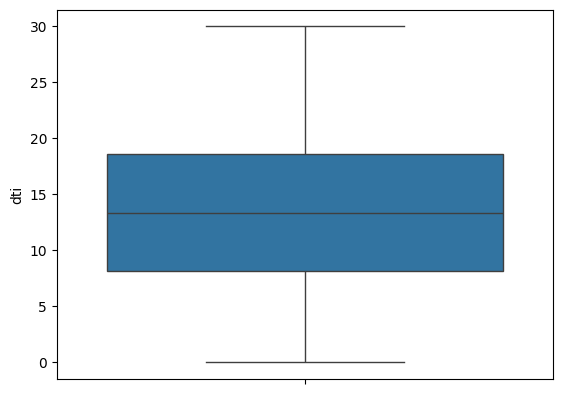

In [39]:
sns.boxplot(data.dti)

## No major outlier detection

<Axes: ylabel='loan_amnt'>

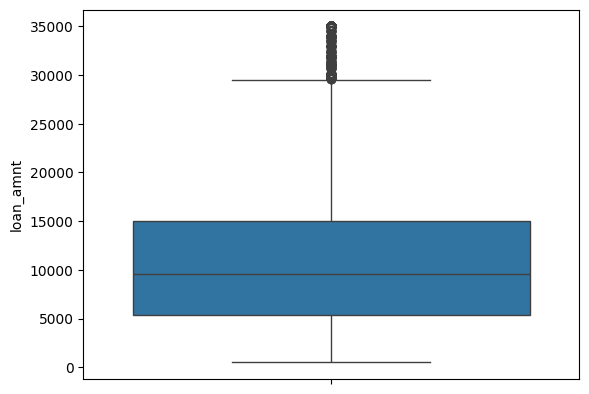

In [40]:
sns.boxplot(data.loan_amnt)

In [41]:
# We can see outliers 

In [42]:
data.loan_amnt.quantile([0.75,0.90,0.95,0.97,0.975, 0.98, 0.99, 1.0])

0.750    15000.0
0.900    21600.0
0.950    25000.0
0.970    28000.0
0.975    30000.0
0.980    30000.0
0.990    35000.0
1.000    35000.0
Name: loan_amnt, dtype: float64

<Axes: ylabel='loan_amnt'>

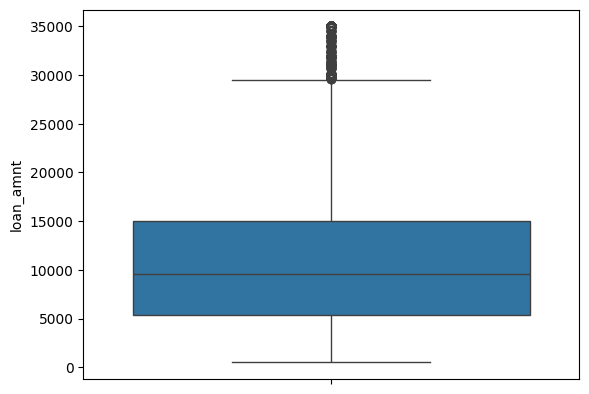

In [43]:
sns.boxplot(data.loan_amnt)

In [44]:
per_98_loan_amnt = data['loan_amnt'].quantile(0.98)
data = data[data.loan_amnt <= per_98_loan_amnt]

<Axes: ylabel='loan_amnt'>

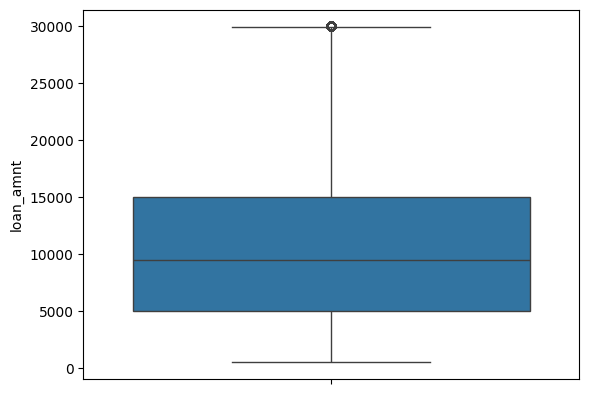

In [45]:
sns.boxplot(data.loan_amnt)

## No major outlier detection

<Axes: ylabel='annual_inc'>

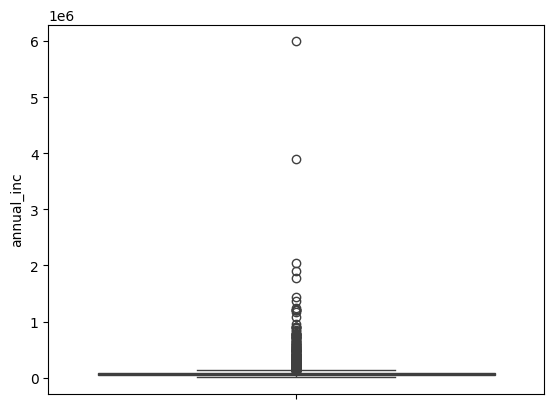

In [46]:
sns.boxplot(data['annual_inc'])

### Evidently indicating the existence of anomalies.
- Thus, taking them out.
- Let's review the quantile information and make the necessary decision.
- There is a significant rise in value for tiny quantile fluctuation, and values beyond the 95 percentile appear to deviate from the overall distribution.
- Consequently, we will use a threshold of 0.95 to remove outliers.

In [47]:
data.annual_inc.quantile([0.5,0.6, 0.75,0.90, 0.95, 0.97,0.98, 0.99])

0.50     57996.0
0.60     65000.0
0.75     80000.0
0.90    113000.0
0.95    140000.0
0.97    160000.0
0.98    180000.0
0.99    225000.0
Name: annual_inc, dtype: float64

In [48]:
qunat_info = data['annual_inc'].quantile(0.95)
data = data[data.annual_inc <= qunat_info]

<Axes: ylabel='annual_inc'>

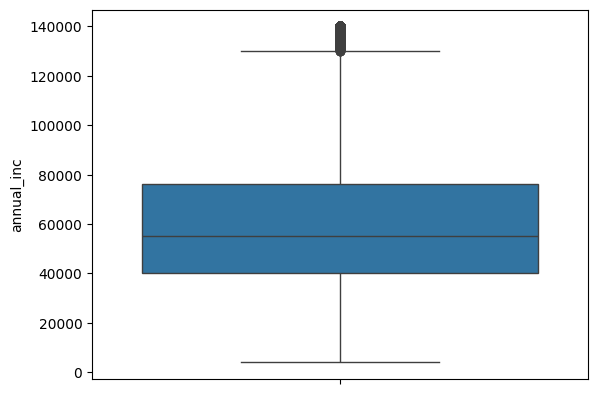

In [49]:
sns.boxplot(data['annual_inc'])

### Putting Categorical Data Visually 
### Since the grade column is already there, we need simply extract the subgrade (int level value) from the sub_grade field.
- We are merely processing and showing defaulter data. So, for the graphs below, subset the data while plotting solely for 'Charged Off' loan_status.

In [50]:
# Categorical data

<Axes: xlabel='loan_status', ylabel='count'>

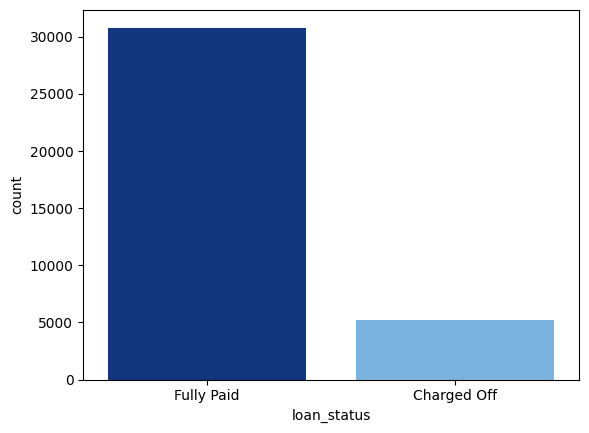

In [51]:
sns.countplot(x = 'loan_status', data = data, hue='loan_status' ,palette = palette_2)

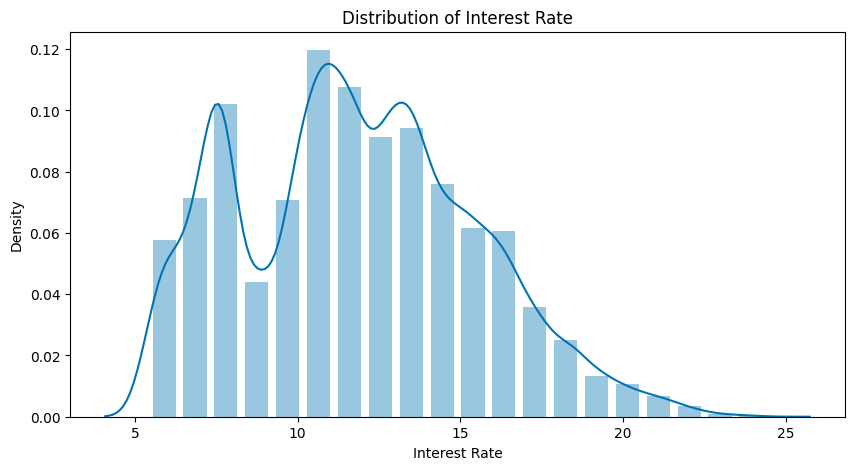

In [112]:
# Distribution of interest rate
plt.figure(figsize=(10,5))
sns.distplot(sorted(data.int_rate),kde=True,bins=20,  hist_kws={"rwidth":0.75})
plt.xlabel('Interest Rate')
plt.ylabel('Density')
plt.title('Distribution of Interest Rate')
plt.show()

#### Inference: The interest rate is more crowded around 5-10 and 10-15 with a drop near 10.

In [52]:
# Sub Grade 

In [53]:
data.sub_grade = pd.to_numeric(data.sub_grade.apply(lambda col : col[-1]))
data.sub_grade.head()

0    2
1    4
2    5
3    1
5    4
Name: sub_grade, dtype: int64

<Axes: xlabel='grade', ylabel='count'>

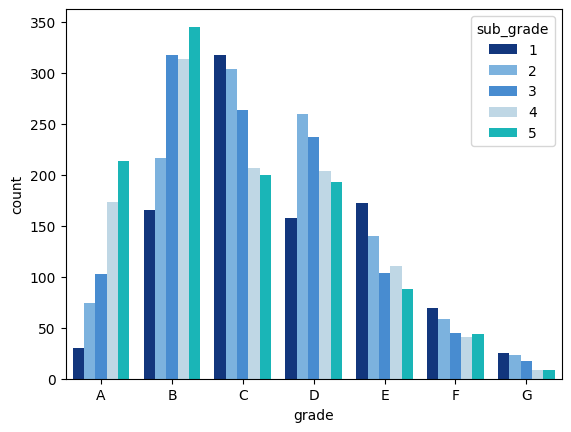

In [54]:
sns.set_palette('colorblind')
sns.countplot(x = 'grade', order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'] , hue = 'sub_grade',data = data[data.loan_status == 'Charged Off'], palette = palette_5)

### Analyzing Grade 

<Axes: xlabel='grade', ylabel='count'>

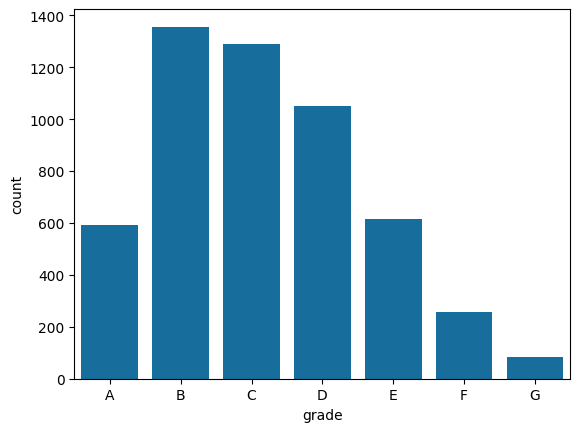

In [55]:
sns.countplot(x = 'grade', data = data[data.loan_status == 'Charged Off'], order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'])

In [56]:
#checking unique values for home_ownership
data['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

In [57]:
#checking unique values for home_ownership
data['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

### Analyzing home_ownership

<Axes: xlabel='home_ownership', ylabel='count'>

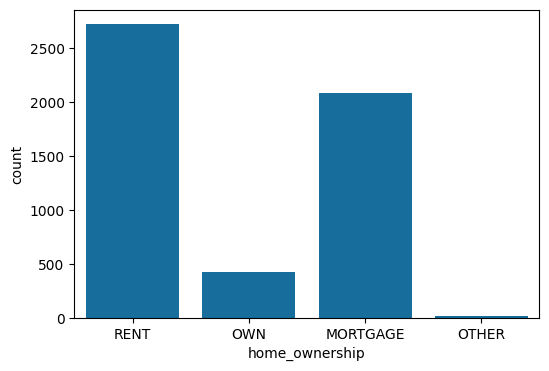

In [58]:
fig, ax = plt.subplots(figsize = (6,4))
# ax.set(yscale = 'log')
sns.countplot(x='home_ownership', data=data[data['loan_status']=='Charged Off'])

In [59]:
# Analysizing purpose 

<Axes: xlabel='count', ylabel='purpose'>

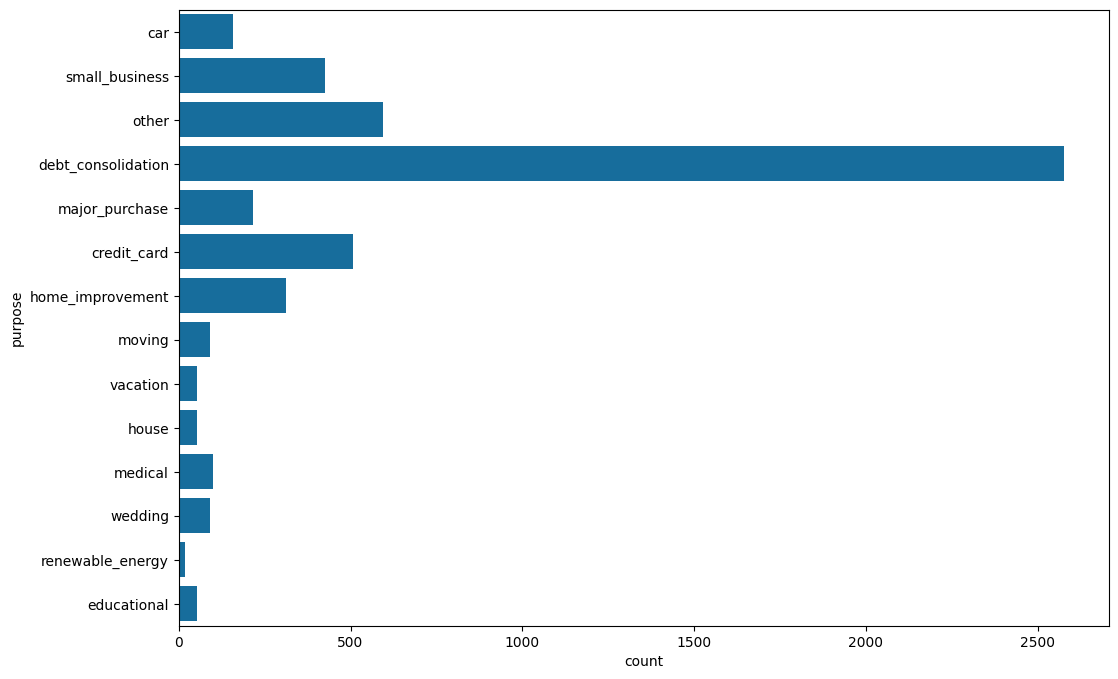

In [60]:
fig, ax = plt.subplots(figsize = (12,8))
sns.countplot(y ='purpose', data=data[data.loan_status == 'Charged Off'])

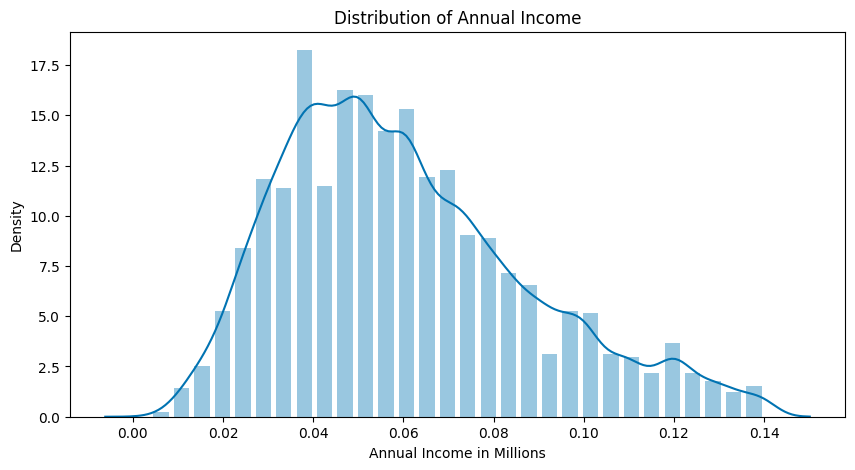

In [111]:
# Distribution of annual_inc
plt.figure(figsize=(10,5))
sns.distplot(data.annual_inc/1000000,kde=True,bins=30,  hist_kws={"rwidth":0.75})
plt.xlabel('Annual Income in Millions')
plt.ylabel('Density')
plt.title('Distribution of Annual Income',fontsize=12)
plt.show()

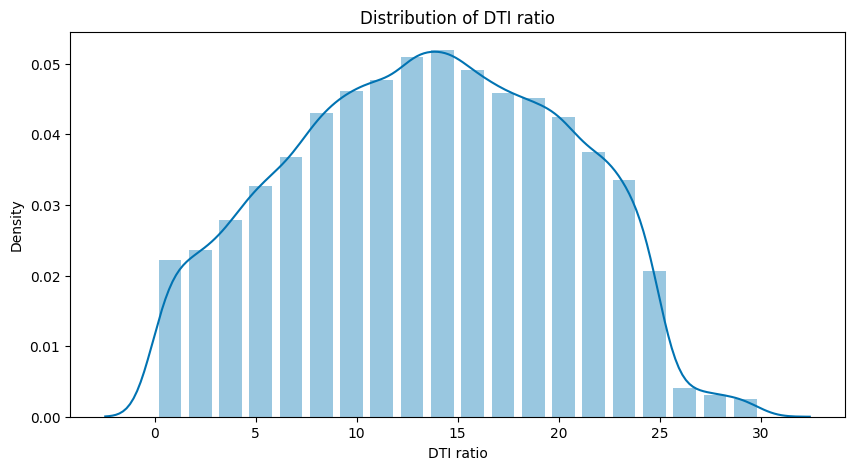

In [115]:
# Distribution of dti
plt.figure(figsize=(10,5))
sns.distplot(data.dti,kde=True,bins=20, hist_kws={"rwidth":0.75})
plt.xlabel('DTI ratio')
plt.ylabel('Density')
plt.title('Distribution of DTI ratio',fontsize=12)
plt.show()

In [61]:
data['home_ownership'].replace(to_replace = ['NONE'],value='OTHER',inplace = True)

### Creating bins for a numerical variable involves grouping the continuous data into discrete intervals or categories. This process is known as binning and is often done to simplify the data, highlight patterns, or facilitate analysis.
- For example, if you have a dataset with ages ranging from 18 to 80, you might create bins like 18-25, 26-35, 36-45, and so on. This categorization transforms the age variable from a continuous range into discrete groups, making it easier to interpret and analyze patterns within specific age ranges.

In [62]:
#creating bins for int_rate,open_acc,revol_util,total_acc
data['int_rate_section'] = pd.cut(data['int_rate'], bins=5,precision =0,labels=['5%-9%','9%-13%','13%-17%','17%-21%','21%-24%'])
data['open_acc_section'] = pd.cut(data['open_acc'],bins = 5,precision =0,labels=['2-10','10-19','19-27','27-36','36-44'])
data['revol_util_section'] = pd.cut(data['revol_util'], bins=5,precision =0,labels=['0-20','20-40','40-60','60-80','80-100'])
data['total_acc_section'] = pd.cut(data['total_acc'], bins=5,precision =0,labels=['2-20','20-37','37-55','55-74','74-90'])
data['annual_inc_section'] = pd.cut(data['annual_inc'], bins=5,precision =0,labels =['3k-31k','31k-58k','58k-85k','85k-112k','112k-140k'])

In [63]:
data.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_util,total_acc,pub_rec_bankruptcies,int_rate_section,open_acc_section,revol_util_section,total_acc_section,annual_inc_section
0,5000,4975.0,36 months,10.65,162.87,B,2,10,RENT,24000.0,...,3,0,83.7,9,0.0,9%-13%,2-10,80-100,2-20,3k-31k
1,2500,2500.0,60 months,15.27,59.83,C,4,0,RENT,30000.0,...,3,0,9.4,4,0.0,13%-17%,2-10,0-20,2-20,3k-31k
2,2400,2400.0,36 months,15.96,84.33,C,5,10,RENT,12252.0,...,2,0,98.5,10,0.0,13%-17%,2-10,80-100,2-20,3k-31k
3,10000,10000.0,36 months,13.49,339.31,C,1,10,RENT,49200.0,...,10,0,21.0,37,0.0,13%-17%,2-10,20-40,20-37,31k-58k
5,5000,5000.0,36 months,7.90,156.46,A,4,3,RENT,36000.0,...,9,0,28.3,12,0.0,5%-9%,2-10,20-40,2-20,31k-58k


## Data analysis on new features obtained from existing features 

Text(0.5, 0, 'Interest Rate')

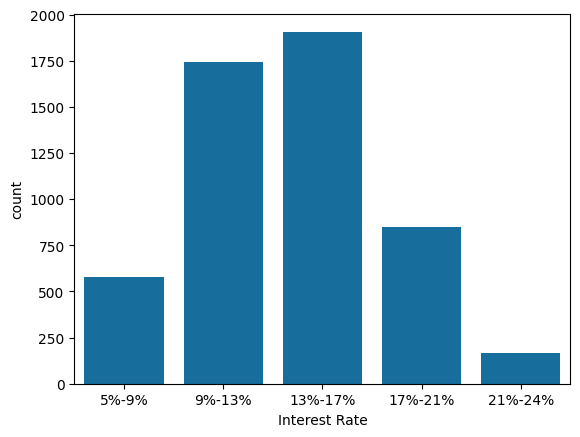

In [64]:
sns.countplot(x='int_rate_section', data=data[data.loan_status == 'Charged Off'])
plt.xlabel('Interest Rate')

<Axes: xlabel='emp_length', ylabel='count'>

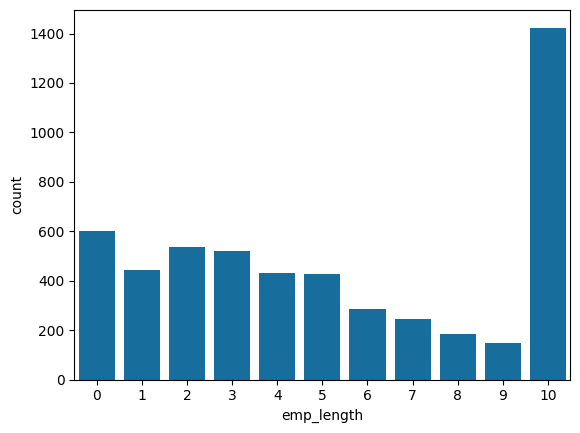

In [65]:
sns.countplot(x='emp_length', data=data[data.loan_status == 'Charged Off'])

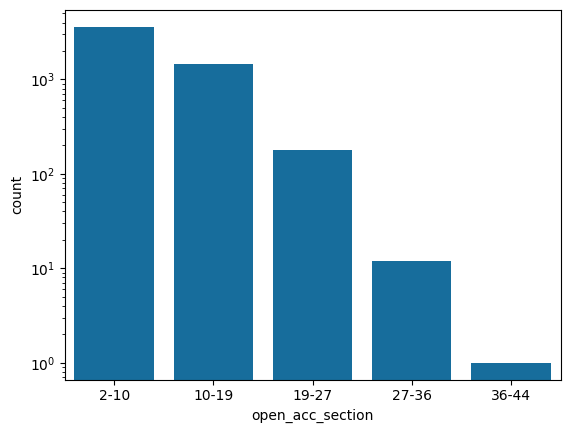

In [66]:
sns.countplot(x='open_acc_section', data=data[data.loan_status == 'Charged Off'])
plt.subplot().set_yscale('log')

<Axes: xlabel='revol_util_section', ylabel='count'>

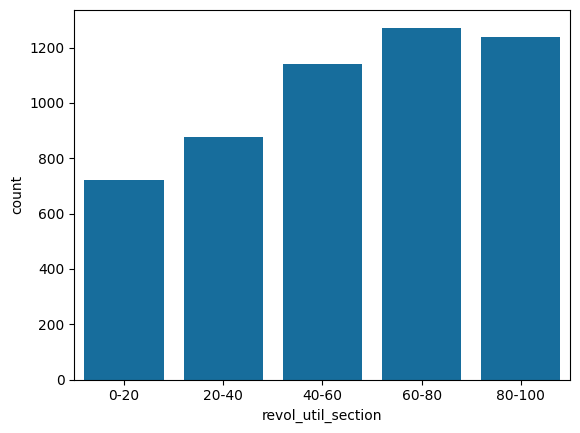

In [67]:
sns.countplot(x='revol_util_section', data=data[data.loan_status == 'Charged Off'])

<Axes: xlabel='total_acc_section', ylabel='count'>

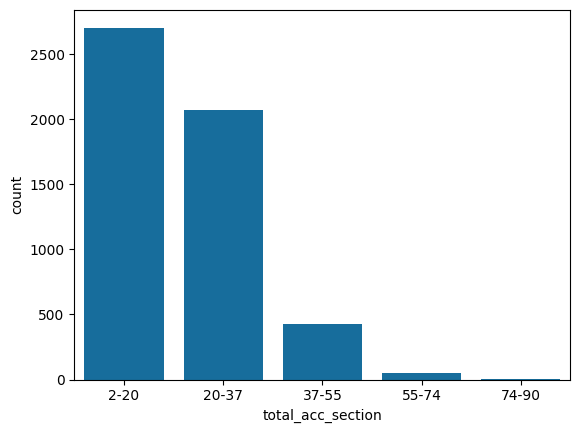

In [68]:
sns.countplot(x='total_acc_section', data=data[data.loan_status == 'Charged Off'])

<Axes: xlabel='annual_inc_section', ylabel='count'>

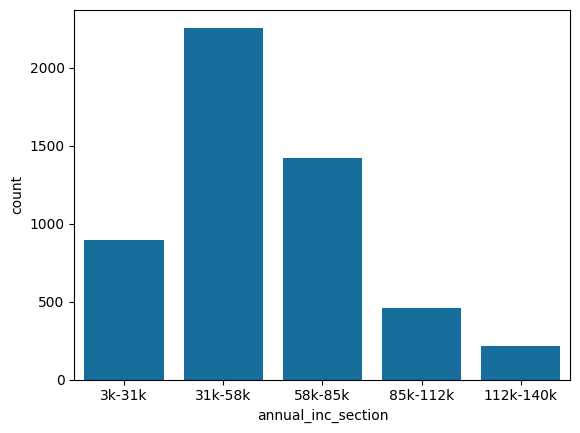

In [69]:
sns.countplot(x='annual_inc_section', data=data[data.loan_status == 'Charged Off'])

<Axes: xlabel='term', ylabel='count'>

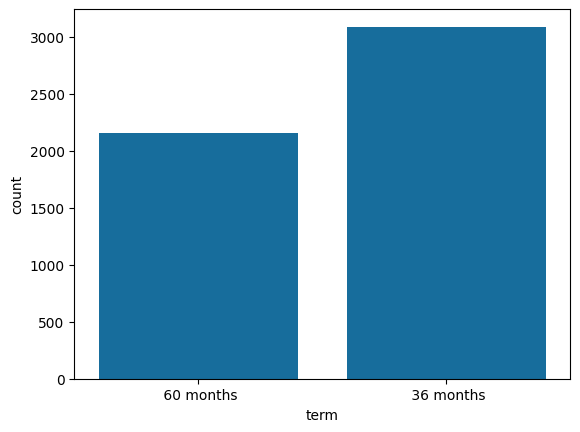

In [70]:
sns.countplot(x='term', data=data[data['loan_status']=='Charged Off'])

<Axes: xlabel='count', ylabel='verification_status'>

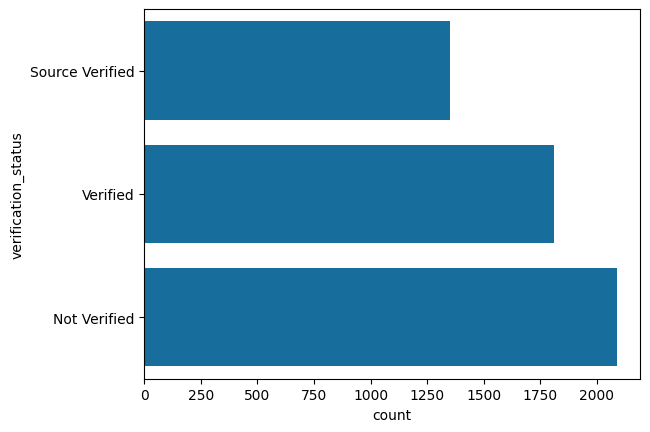

In [71]:
sns.countplot(y='verification_status', data=data[data['loan_status']=='Charged Off'])

## Month and Year derivation

In [72]:
month_year = data['issue_d'].str.partition("-")

In [73]:
data['part_month'] = month_year[0]
data['part_year'] = month_year[2]

In [74]:
data.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,revol_util,total_acc,pub_rec_bankruptcies,int_rate_section,open_acc_section,revol_util_section,total_acc_section,annual_inc_section,part_month,part_year
0,5000,4975.0,36 months,10.65,162.87,B,2,10,RENT,24000.0,...,83.7,9,0.0,9%-13%,2-10,80-100,2-20,3k-31k,Dec,11
1,2500,2500.0,60 months,15.27,59.83,C,4,0,RENT,30000.0,...,9.4,4,0.0,13%-17%,2-10,0-20,2-20,3k-31k,Dec,11
2,2400,2400.0,36 months,15.96,84.33,C,5,10,RENT,12252.0,...,98.5,10,0.0,13%-17%,2-10,80-100,2-20,3k-31k,Dec,11
3,10000,10000.0,36 months,13.49,339.31,C,1,10,RENT,49200.0,...,21.0,37,0.0,13%-17%,2-10,20-40,20-37,31k-58k,Dec,11
5,5000,5000.0,36 months,7.90,156.46,A,4,3,RENT,36000.0,...,28.3,12,0.0,5%-9%,2-10,20-40,2-20,31k-58k,Dec,11


### Analyzing

C:\Users\Admin\AppData\Local\Temp\ipykernel_748\3631152284.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='part_month', data=data[data['loan_status']=='Charged Off'], palette= custom_palette)
C:\Users\Admin\AppData\Local\Temp\ipykernel_748\3631152284.py:3: UserWarning: The palette list has more values (24) than needed (12), which may not be intended.
  sns.countplot(x='part_month', data=data[data['loan_status']=='Charged Off'], palette= custom_palette)
C:\Users\Admin\AppData\Local\Temp\ipykernel_748\3631152284.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='part_year', data=data[data['loan_status']=='Charged Off'], palette= custom_palette)
C:\Users\Admin\AppData\Local\Tem

<Axes: xlabel='part_year', ylabel='count'>

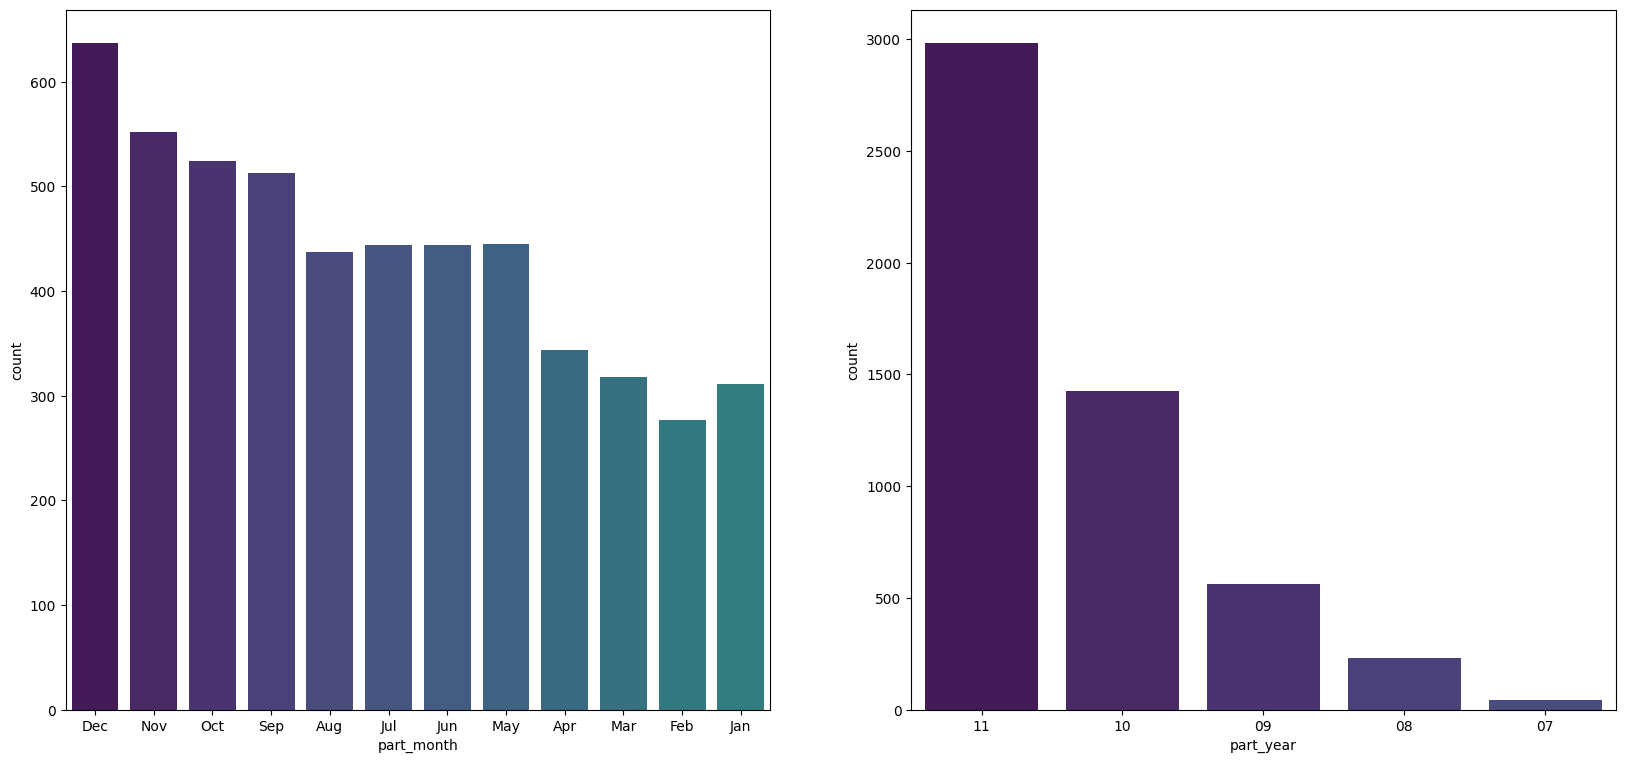

In [75]:
plt.figure(figsize=(20,20))
plt.subplot(221)
sns.countplot(x='part_month', data=data[data['loan_status']=='Charged Off'], palette= custom_palette)
plt.subplot(222)
sns.countplot(x='part_year', data=data[data['loan_status']=='Charged Off'], palette= custom_palette)

In [76]:
data['installment_section'] = pd.cut(data['installment'], bins=10,precision =0,labels=['14-145','145-274','274-403','403-531','531-660','660-789','789-918','918-1047','1047-1176','1176-1305'])
data['funded_amnt_inv_section'] = pd.cut(data['funded_amnt_inv'], bins=7,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k']) ## bin is starting from -35?
data['loan_amnt_section'] = pd.cut(data['loan_amnt'], bins=7,precision =0,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])
data['dti_section'] = pd.cut(data['dti'], bins=5,precision =0,labels=['0-6','6-12','12-18','18-24','24-30'])

C:\Users\Admin\AppData\Local\Temp\ipykernel_748\1714075479.py:3: UserWarning: The palette list has more values (24) than needed (1), which may not be intended.
  sns.countplot(x='funded_amnt_inv_section', data=data[data['loan_status']=='Charged Off'], hue='loan_status' ,palette= custom_palette)
C:\Users\Admin\AppData\Local\Temp\ipykernel_748\1714075479.py:7: UserWarning: The palette list has more values (25) than needed (1), which may not be intended.
  sns.countplot(x='installment_section', data=data[data['loan_status']=='Charged Off'], hue='loan_status' , palette = palette)
C:\Users\Admin\AppData\Local\Temp\ipykernel_748\1714075479.py:9: UserWarning: The palette list has more values (25) than needed (1), which may not be intended.
  sns.countplot(x='dti_section', data=data[data['loan_status']=='Charged Off'], hue='loan_status' ,palette = palette)


<Axes: xlabel='dti_section', ylabel='count'>

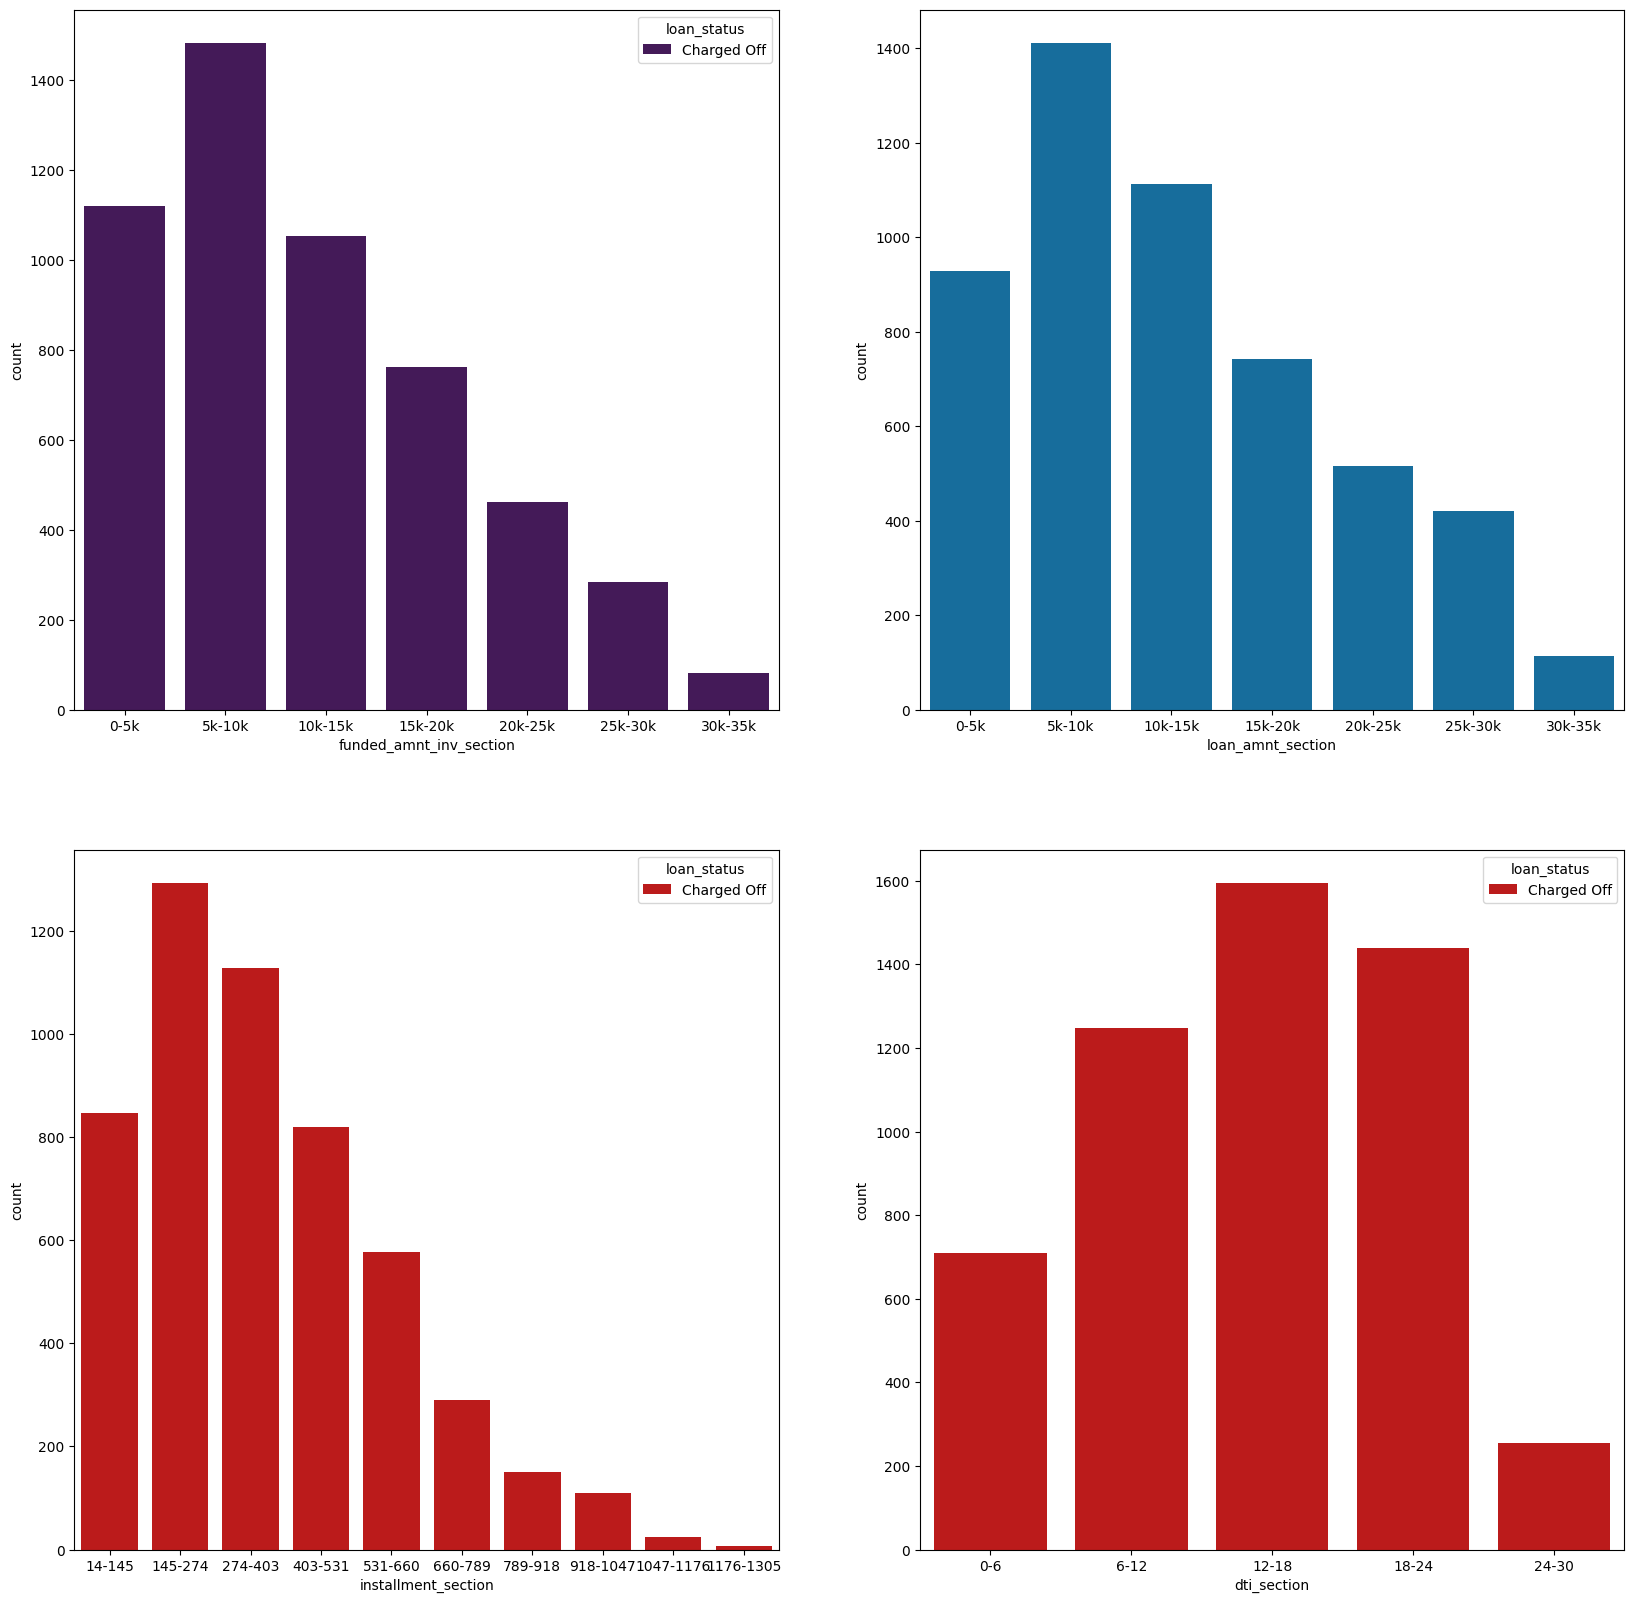

In [77]:
plt.figure(figsize=(20,20))
plt.subplot(221)
sns.countplot(x='funded_amnt_inv_section', data=data[data['loan_status']=='Charged Off'], hue='loan_status' ,palette= custom_palette)
plt.subplot(222)
sns.countplot(x='loan_amnt_section', data=data[data['loan_status']=='Charged Off'])
plt.subplot(223)
sns.countplot(x='installment_section', data=data[data['loan_status']=='Charged Off'], hue='loan_status' , palette = palette)
plt.subplot(224)
sns.countplot(x='dti_section', data=data[data['loan_status']=='Charged Off'], hue='loan_status' ,palette = palette)

# Analysis

#### The preceding analysis of charged-off loans for each variable suggests the following. When there is a higher likelihood of default

- Applicants whose home ownership status is 'RENT' - Applicants who utilize the loan to pay off other debts
- Applicants who earn a 13-17% interest rate
- Applicants with incomes ranging from 31201 to 58402
- Applicants with 20-37 open_acc - Applicants with 10 years of employment - When investor funded amount is between 5000-10000 - Loan amount is between 5429 - 10357 - Dti is between 12-18 

# Moving ahaed with more analysis

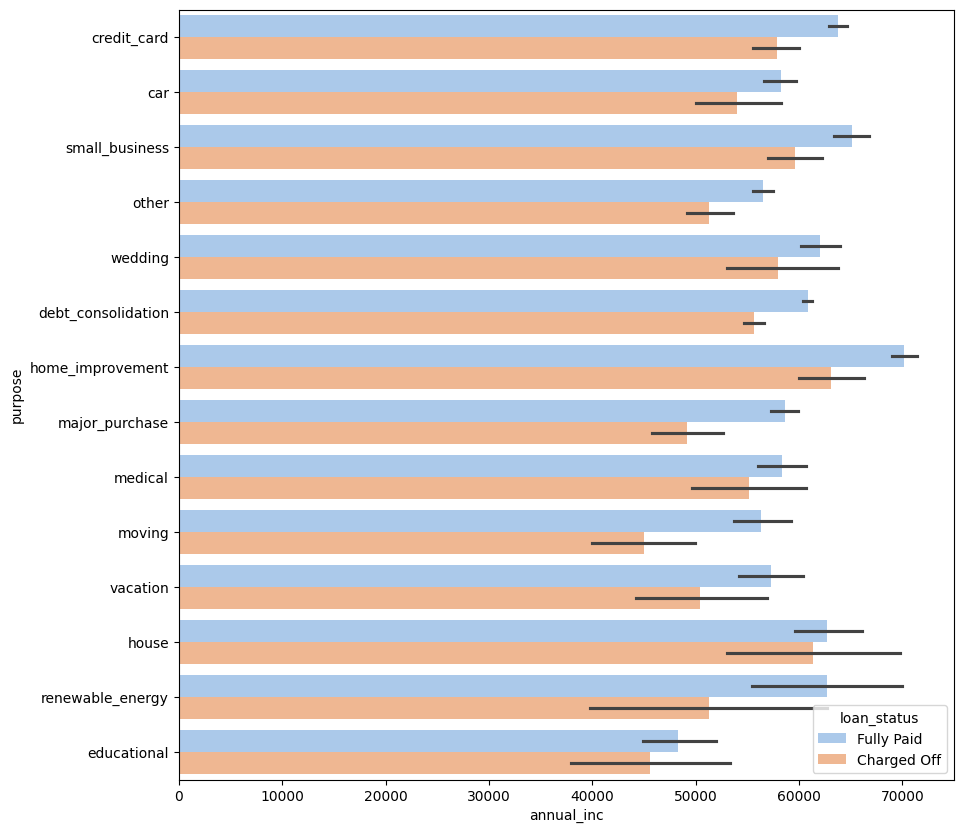

In [78]:
plt.figure(figsize=(10,10))
sns.barplot(data =data ,x='annual_inc', y='purpose', hue ='loan_status',palette="pastel")
plt.show()

In [79]:
data.columns

Index(['loan_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'dti',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_util', 'total_acc', 'pub_rec_bankruptcies', 'int_rate_section',
       'open_acc_section', 'revol_util_section', 'total_acc_section',
       'annual_inc_section', 'part_month', 'part_year', 'installment_section',
       'funded_amnt_inv_section', 'loan_amnt_section', 'dti_section'],
      dtype='object')

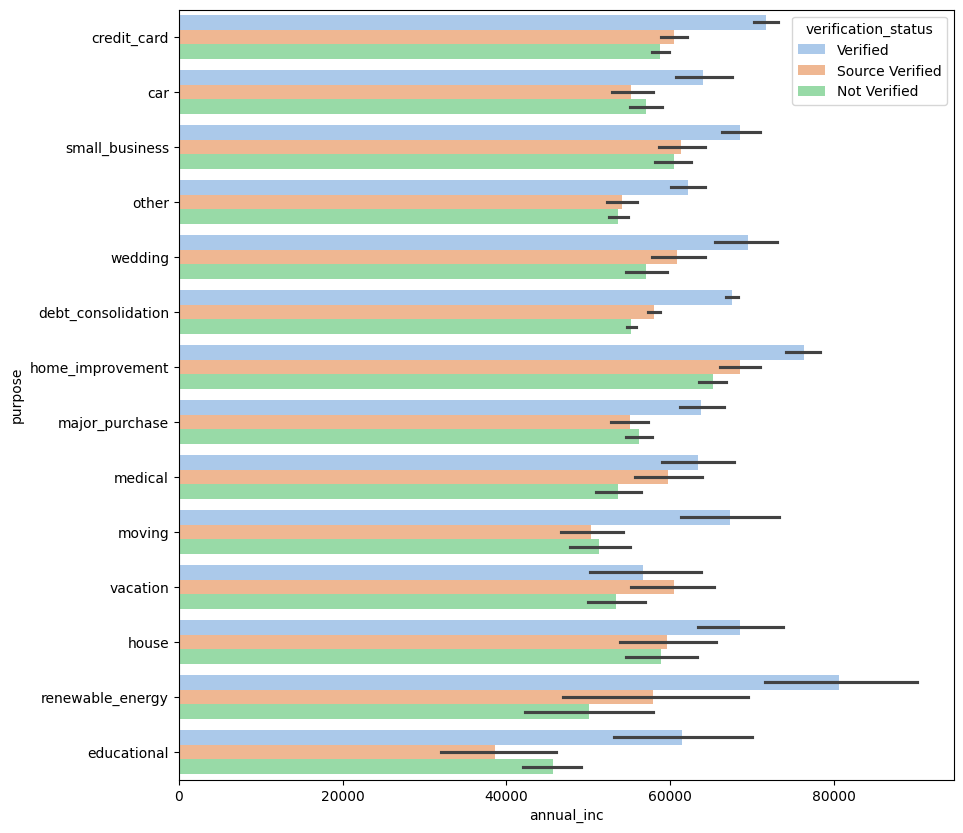

In [80]:
plt.figure(figsize=(10,10))
sns.barplot(data =data,x='annual_inc', y='purpose', hue ='verification_status',palette="pastel")
plt.show()

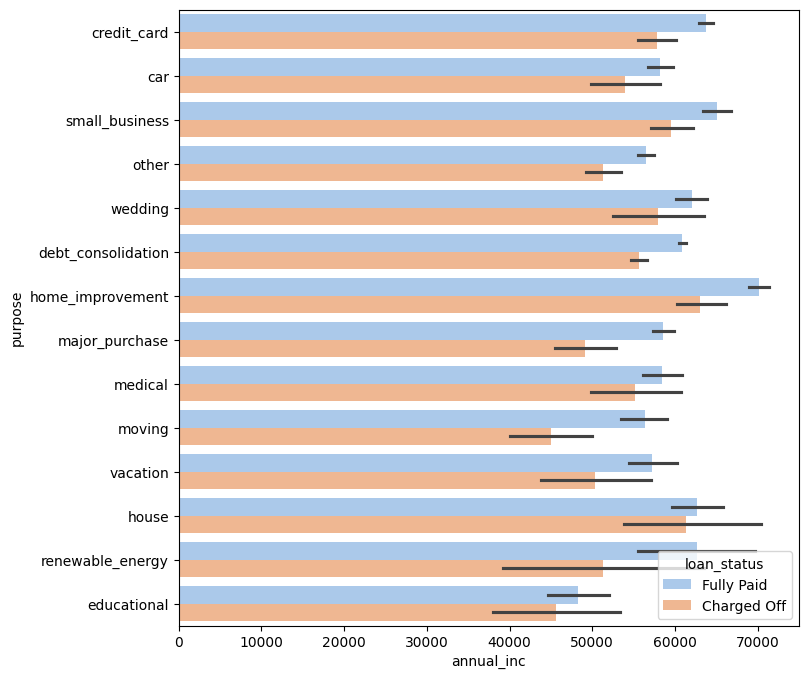

In [81]:
plt.figure(figsize=(8,8))
sns.barplot(data =data,x='annual_inc', y='purpose', hue ='loan_status',palette="pastel")
plt.show()

### Even while "debt_consolation" has the biggest number of loans applied for and defaulted, the annual income of individuals who applied isn't the highest. 

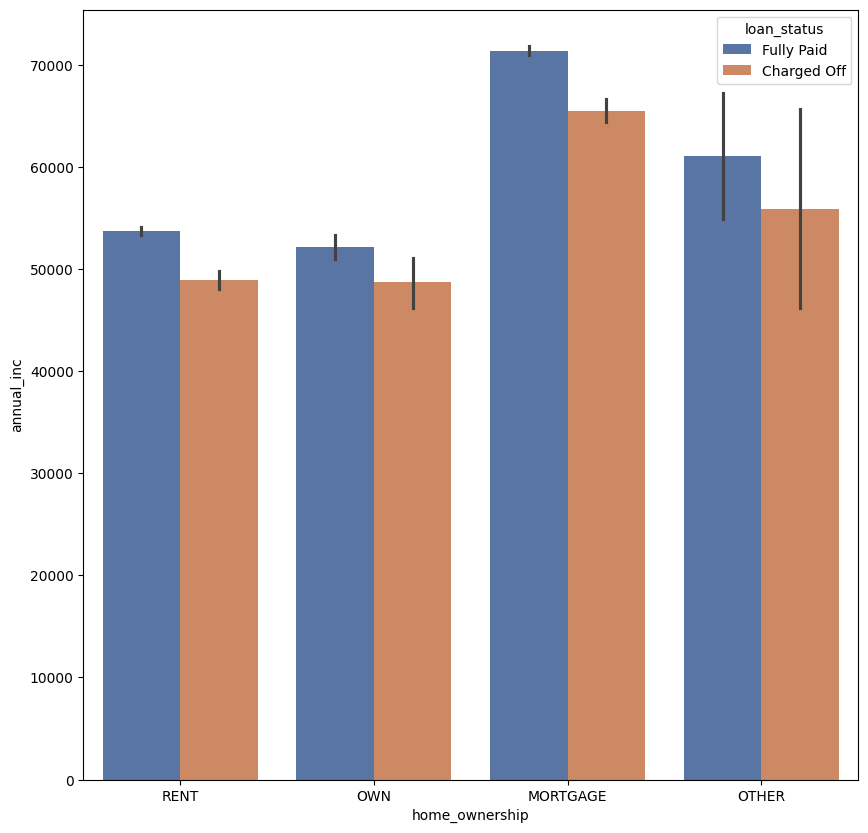

In [82]:
plt.figure(figsize=(10,10))
sns.barplot(data = data,x='home_ownership', y='annual_inc', hue ='loan_status',palette="deep")
plt.show()

#### 2.Annual income vs home ownership

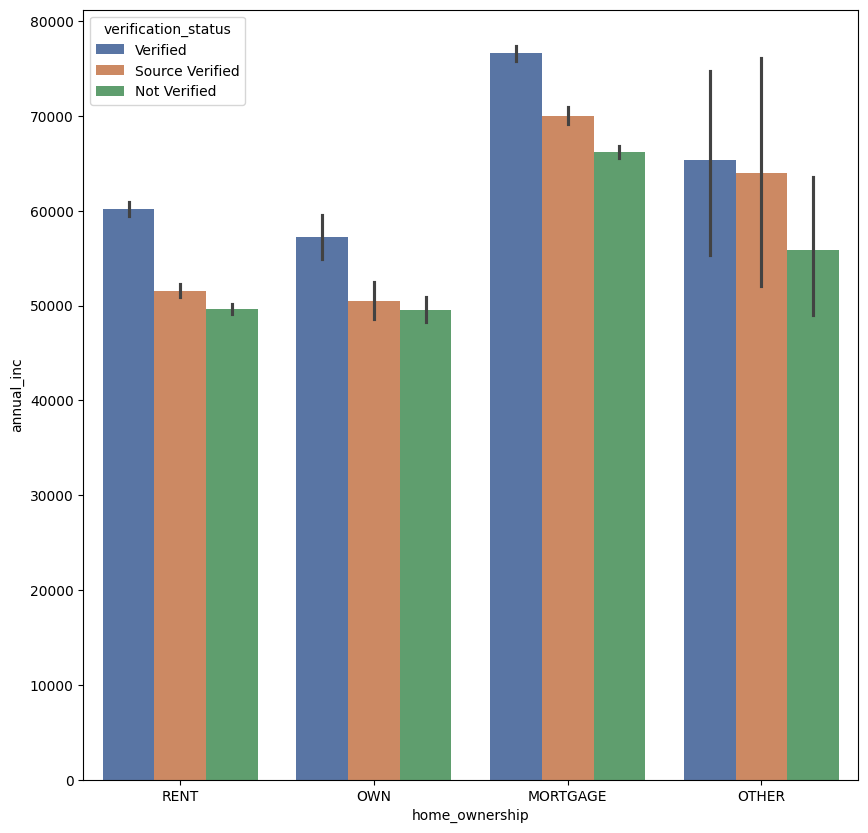

In [83]:
plt.figure(figsize=(10,10))
sns.barplot(data = data,x='home_ownership', y='annual_inc', hue ='verification_status',palette="deep")
plt.show()

### Annual Income vs Loan amount and Intrest Rate vs Annual Income

<Axes: xlabel='int_rate_section', ylabel='annual_inc'>

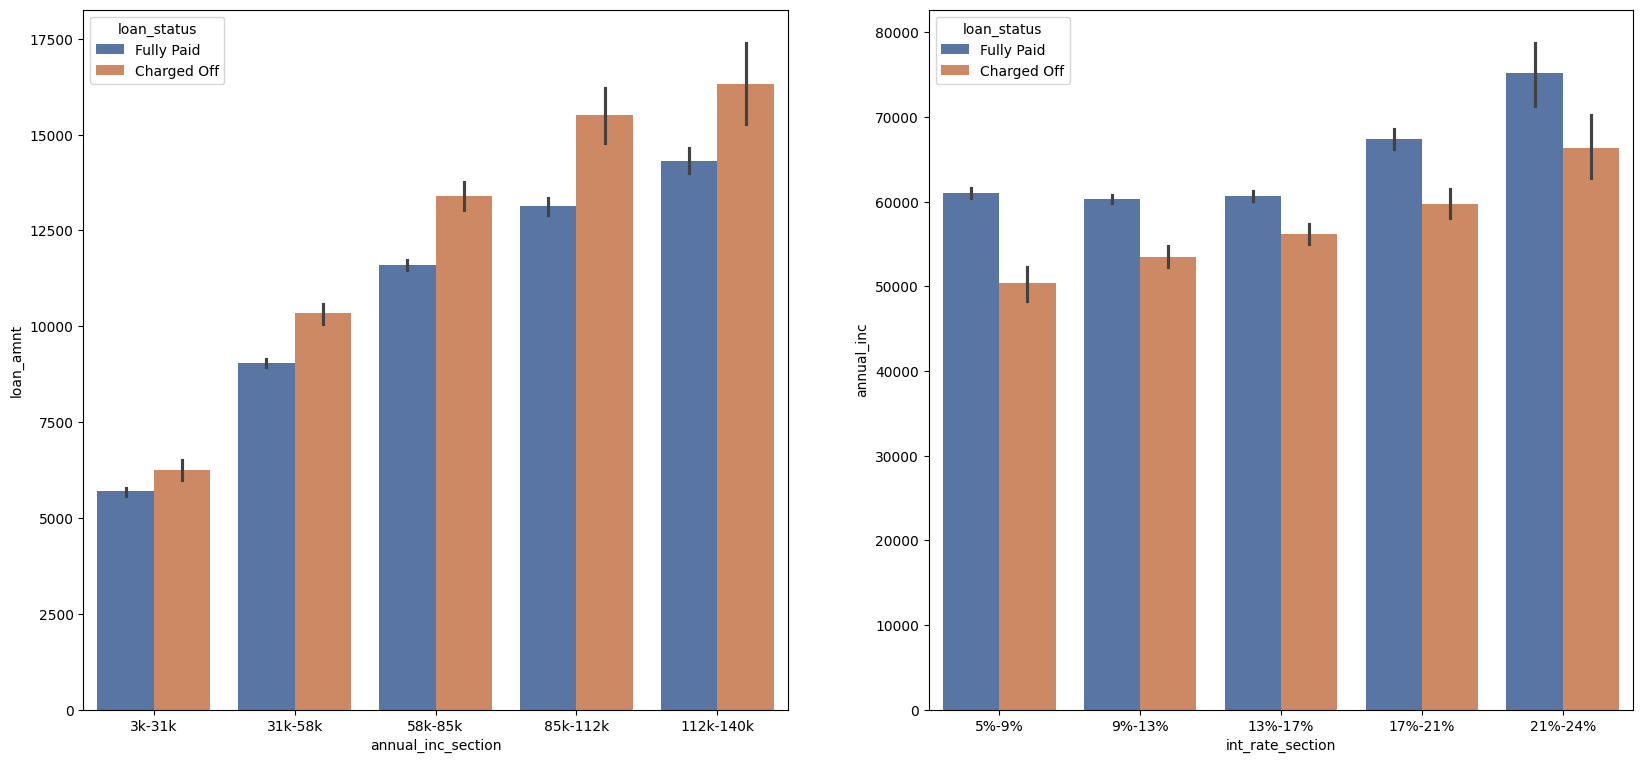

In [84]:
plt.figure(figsize=(20,20))
plt.subplot(221)
sns.barplot(x = "annual_inc_section", y = "loan_amnt", hue = 'loan_status', data = data, palette="deep")
plt.subplot(222)
sns.barplot(data = data,x='int_rate_section', y='annual_inc', hue ='loan_status',palette="deep")

### Analyzing loan amount with other section

#### Section on Loan Amount and Interest Rates

<Axes: xlabel='loan_amnt_section', ylabel='int_rate'>

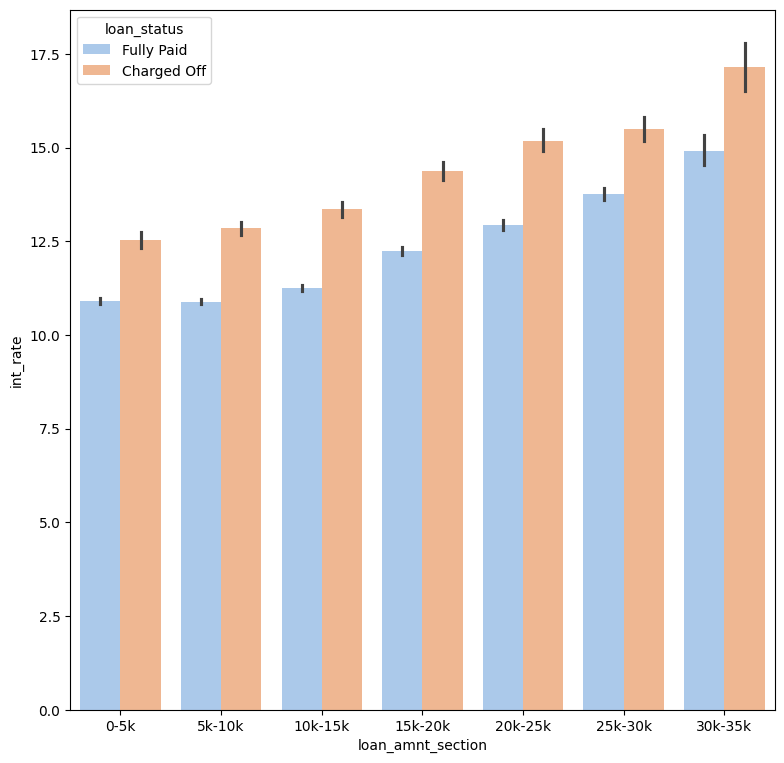

In [85]:
plt.figure(figsize=(20,20))
plt.subplot(221)
sns.barplot(data = data,x='loan_amnt_section', y='int_rate', hue ='loan_status',palette="pastel")

#### Loan amount vs Purpose and Loan amount vs Home ownership

<Axes: xlabel='loan_amnt', ylabel='home_ownership'>

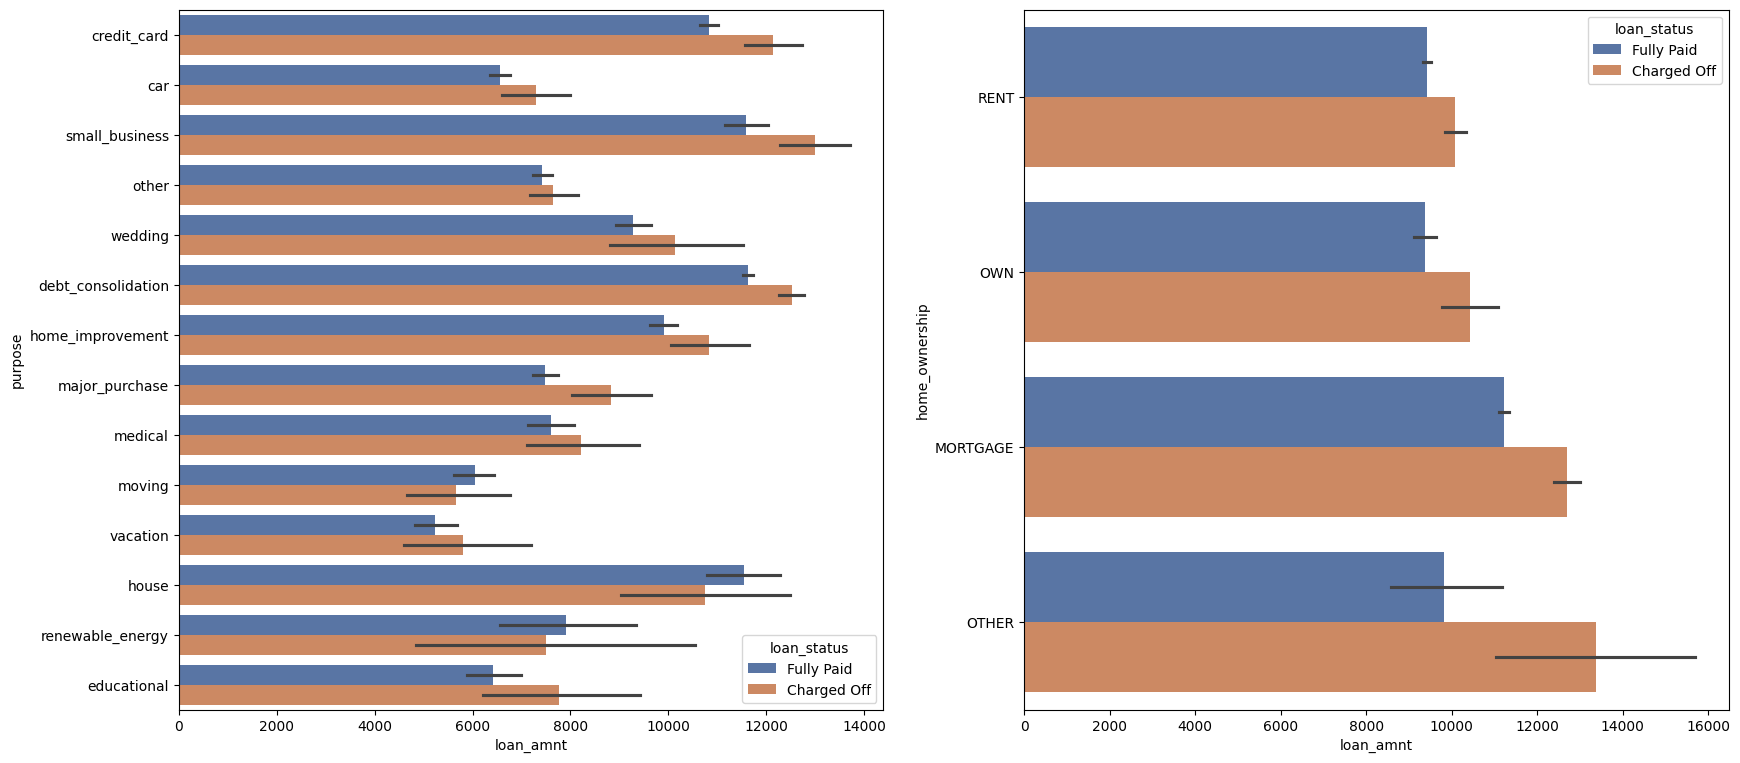

In [86]:
plt.figure(figsize=(20,20))
plt.subplot(221)
sns.barplot(data = data,x='loan_amnt', y='purpose', hue ='loan_status',palette="deep")
plt.subplot(222)
sns.barplot(data = data,x='loan_amnt', y='home_ownership', hue ='loan_status',palette="deep")

#### Loan amount vs Employee length and Loan amount vs Verfication status

<Axes: xlabel='verification_status', ylabel='loan_amnt'>

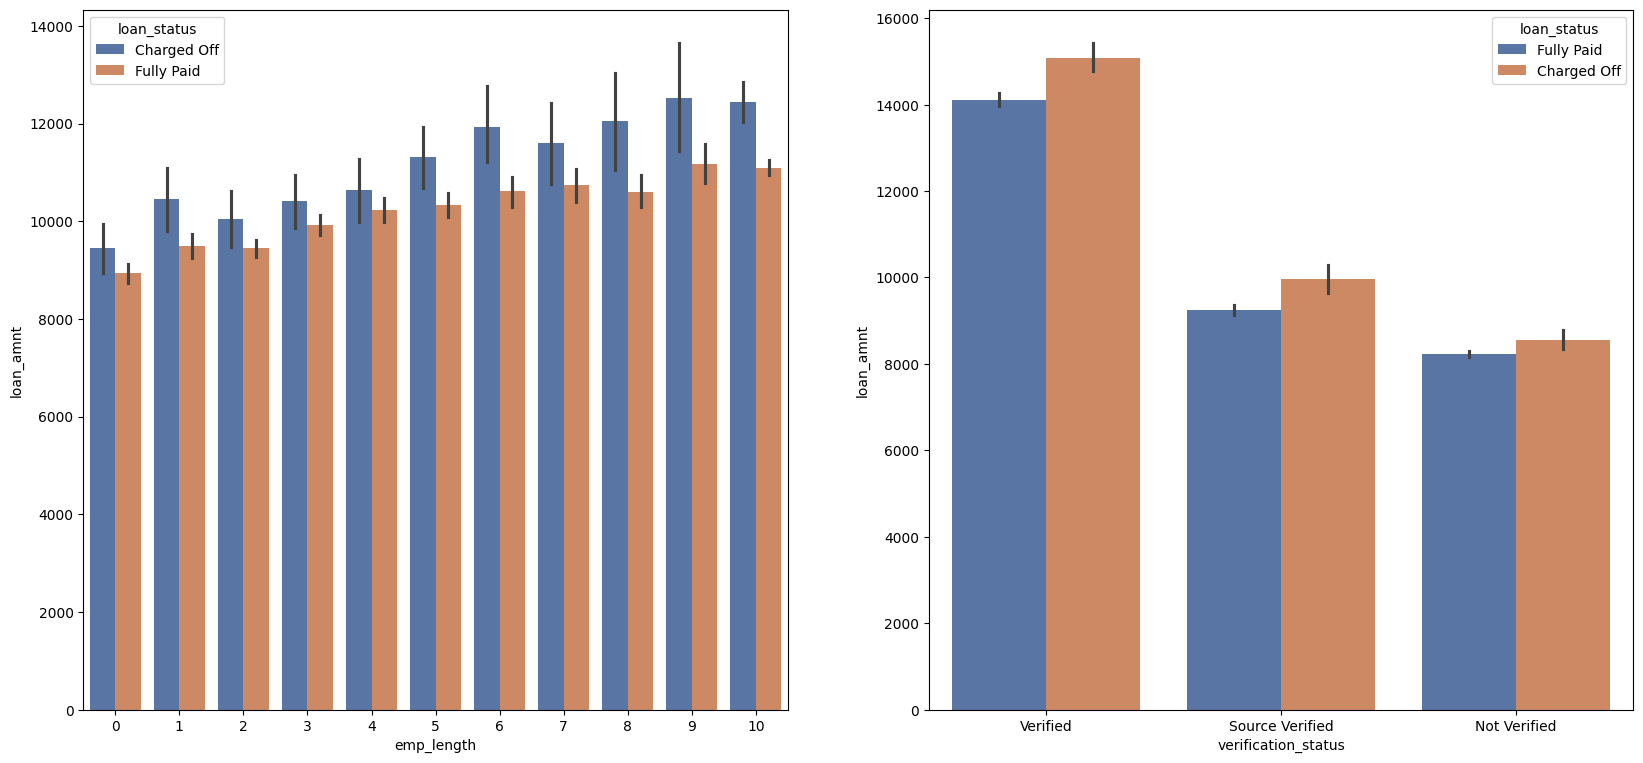

In [87]:
plt.figure(figsize=(20,20))
plt.subplot(221)
sns.barplot(data = data ,y='loan_amnt', x='emp_length', hue ='loan_status',palette="deep")
plt.subplot(222)
sns.barplot(data = data,y='loan_amnt', x='verification_status', hue ='loan_status',palette="deep")

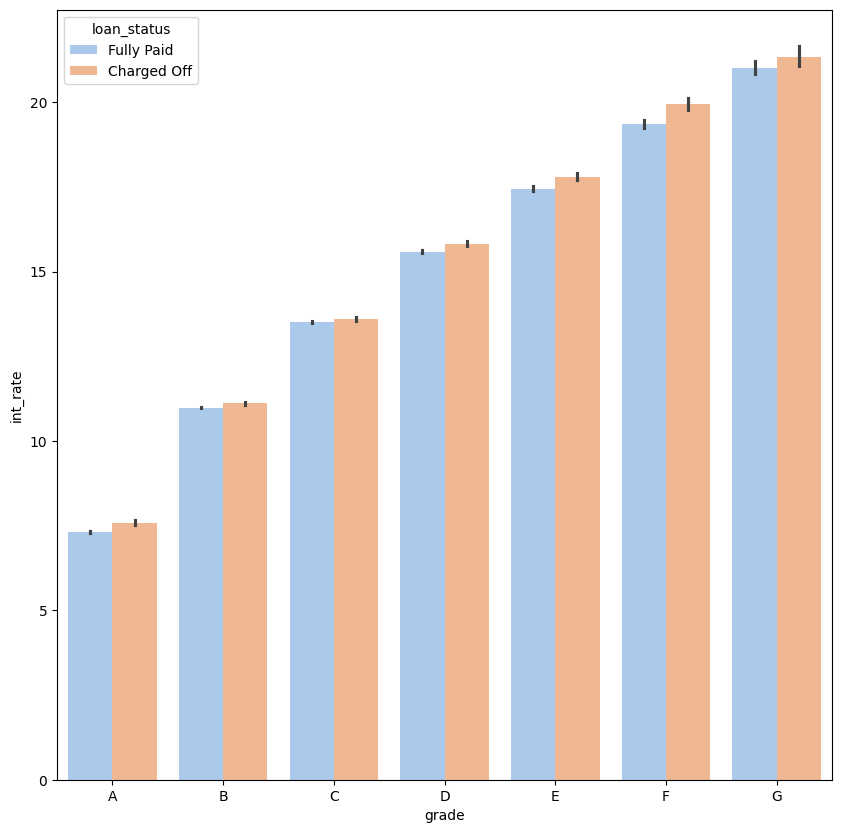

In [88]:
plt.figure(figsize=(10,10))
sns.barplot(data = data ,y='int_rate', x='grade', hue ='loan_status',palette="pastel", order=['A','B','C','D','E','F','G'])
plt.show()

# LINE PLOT

- Loan amount vs purpose
- Loan amount vs Home ownership status

<Axes: xlabel='home_ownership', ylabel='loan_amnt'>

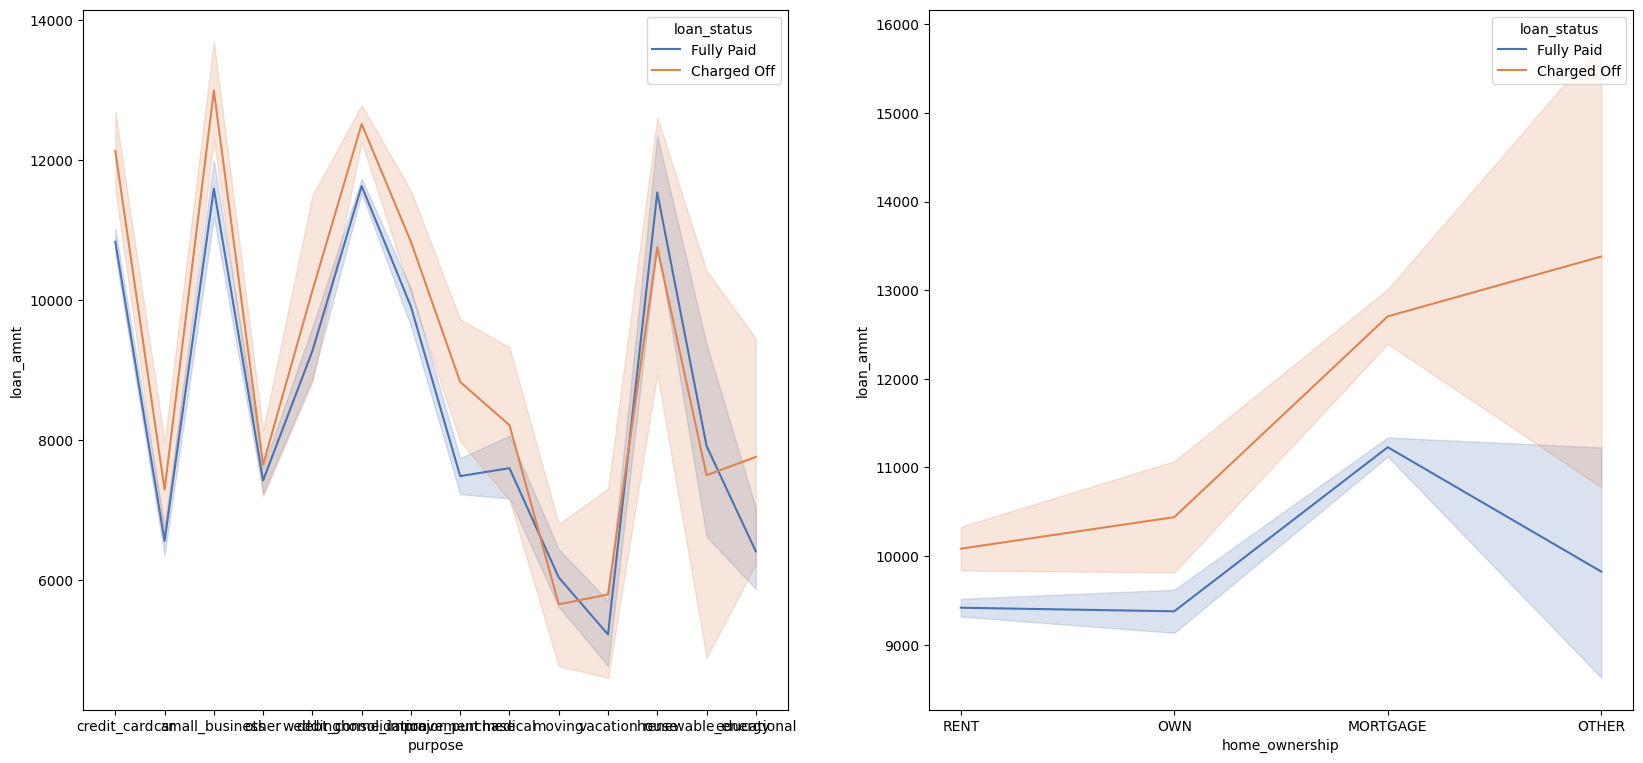

In [89]:
plt.figure(figsize=(20,20))
plt.subplot(221)
sns.lineplot(data = data,y='loan_amnt', x='purpose', hue ='loan_status',palette="deep")
plt.subplot(222)
sns.lineplot(data = data,y='loan_amnt', x='home_ownership', hue ='loan_status',palette="deep")

#### loan_amnt vs part_month
#### loan_amnt vs part_year

<Axes: xlabel='part_year', ylabel='loan_amnt'>

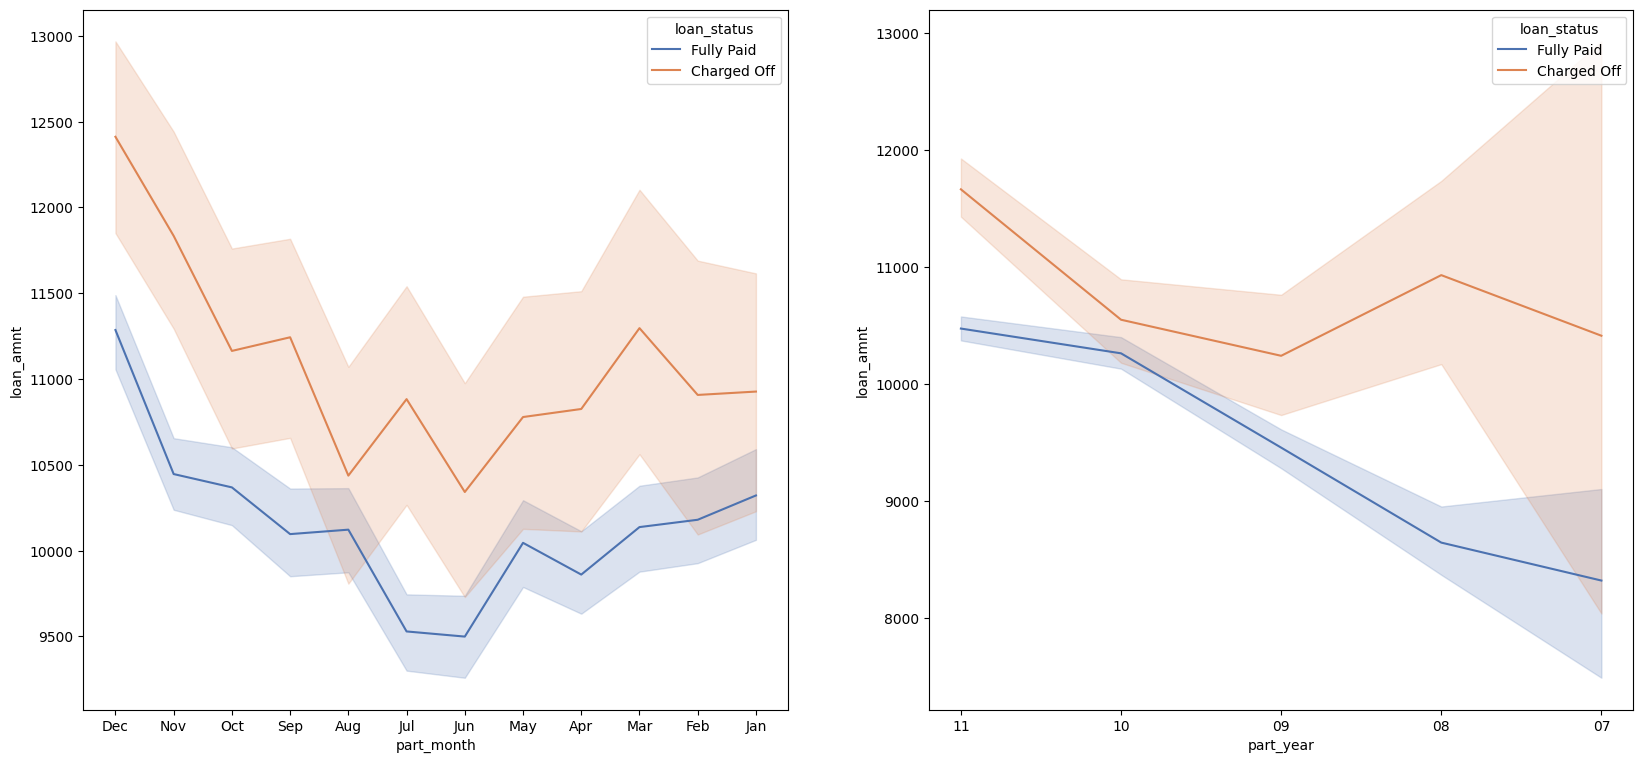

In [90]:
plt.figure(figsize=(20,20))
plt.subplot(221)
sns.lineplot(data = data ,y='loan_amnt', x='part_month', hue ='loan_status',palette="deep")
plt.subplot(222)
sns.lineplot(data = data,y='loan_amnt', x='part_year', hue ='loan_status',palette="deep")

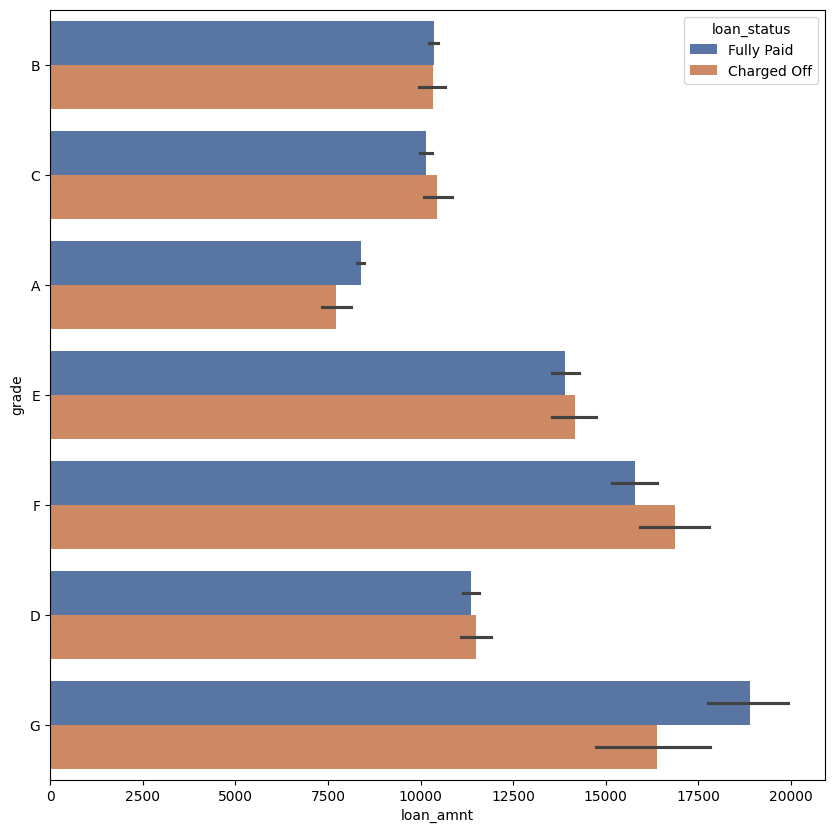

In [91]:
plt.figure(figsize=(10,10))
sns.barplot(data = data ,x='loan_amnt', y='grade', hue ='loan_status',palette="deep")
plt.show()

#### Loan amount section with comparison with grade status 

<Figure size 1000x1000 with 0 Axes>

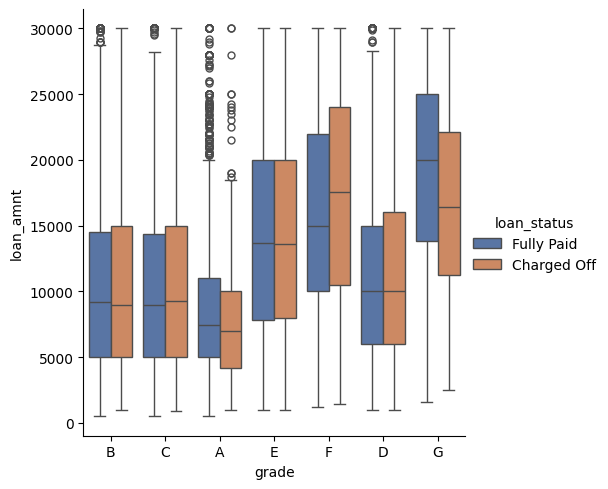

In [92]:
plt.figure(figsize=(10,10))
sns.catplot(data = data ,y='loan_amnt', x='grade', hue ='loan_status',palette="deep", kind = 'box')
plt.show()

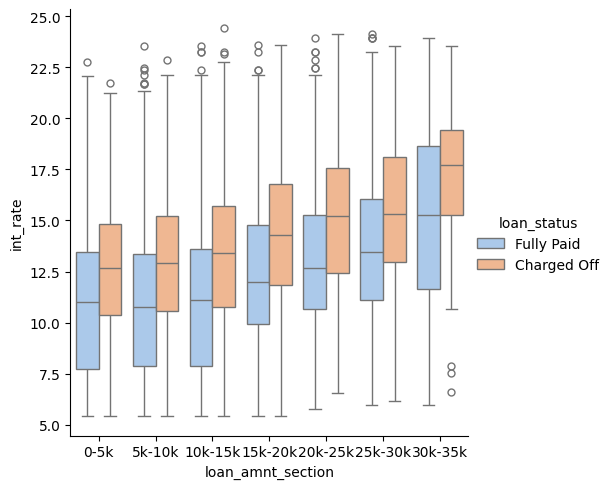

In [93]:
sns.catplot(data =data,y ='int_rate', x ='loan_amnt_section', hue ='loan_status',palette="pastel",kind = 'box')

### In comparison to completely paid loans, charged-off loans have interest rates that are much higher across all loan_amount groups. 
- This may serve as a fairly potent motivator for loan default.

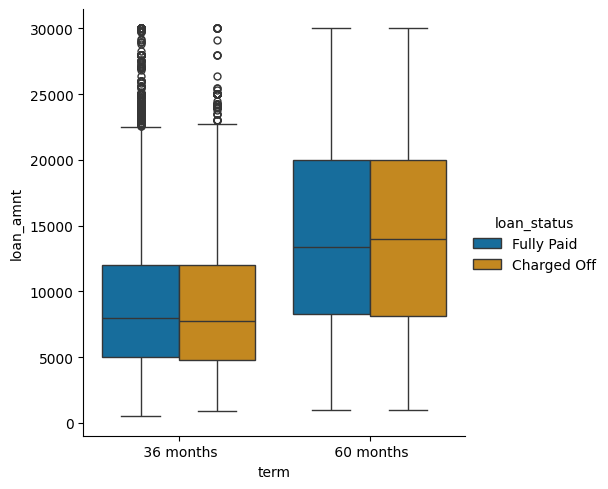

In [94]:
sns.catplot(data = data , x = 'term', y = 'loan_amnt', hue = 'loan_status', kind = 'box')

### In comparison, when it comes to loans, the largest loan approved for what reason
- This may serve as a fairly potent motivator for loan.

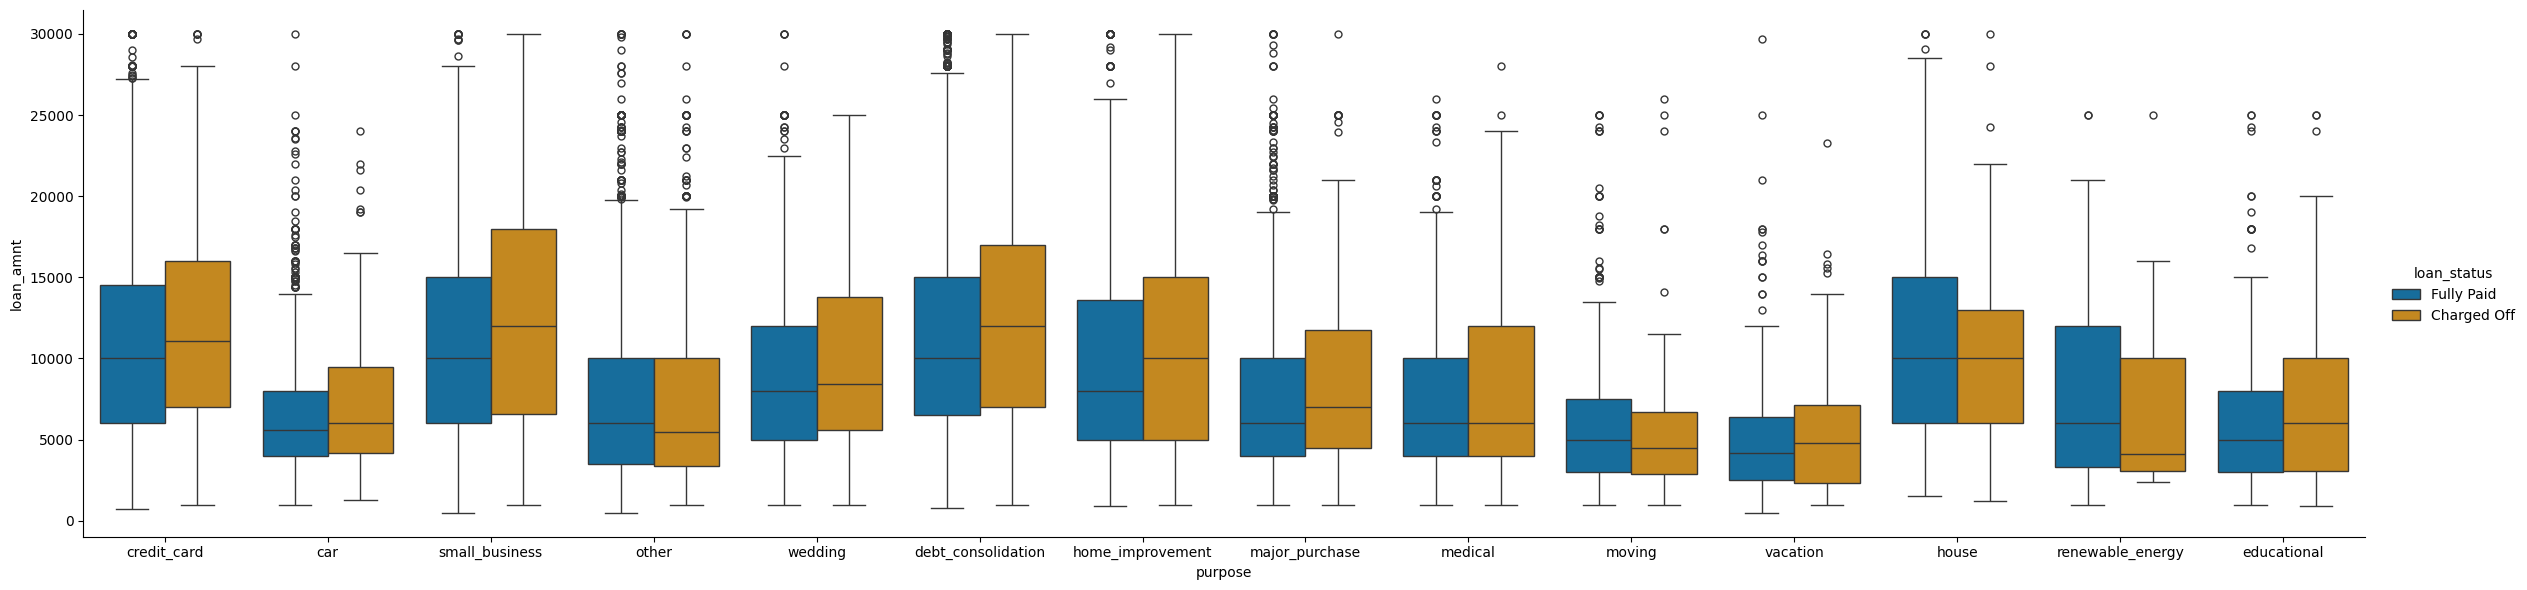

In [95]:
sns.catplot(data = data , x = 'purpose', y = 'loan_amnt', hue = 'loan_status', kind = 'box', height=6, aspect=4)


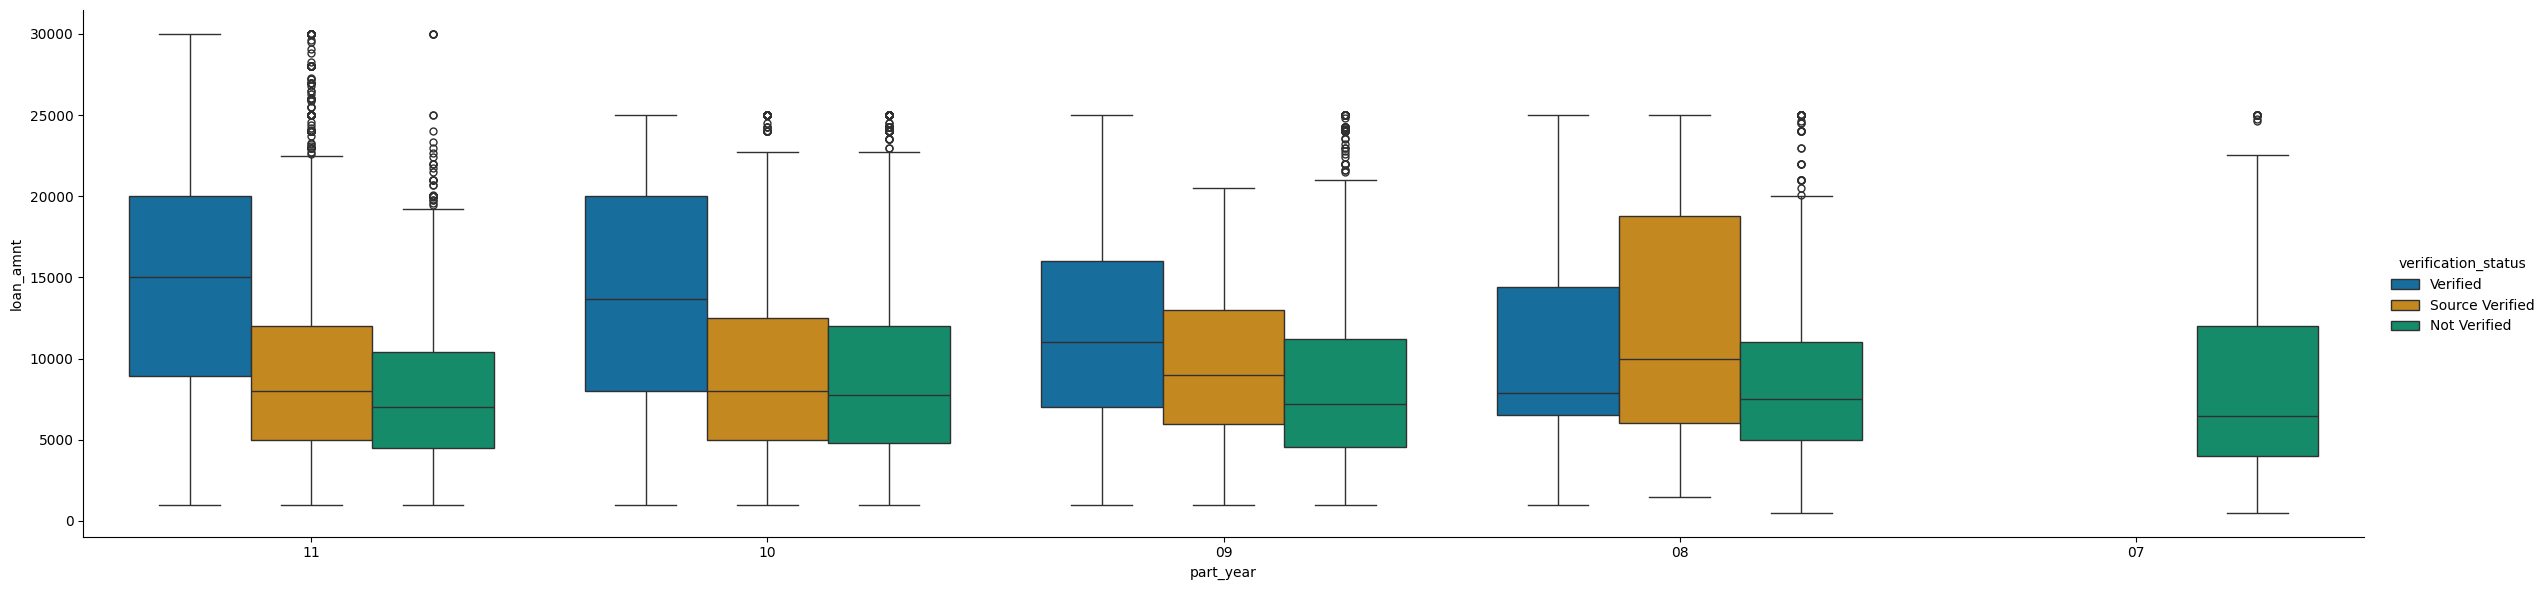

In [96]:
sns.catplot(data = data , x = 'part_year', y = 'loan_amnt', hue = 'verification_status', kind = 'box', height=6, aspect=4)


In [257]:
dtype_df = data.dtypes
float_cols = dtype_df.iloc[(dtype_df=='float64').values].index
int_cols = dtype_df.iloc[(dtype_df=='int64').values].index
combined_index = float_cols.to_list() + int_cols.to_list()
data[combined_index].corr()

,funded_amnt_inv,int_rate,installment,annual_inc,dti,revol_util,pub_rec_bankruptcies,loan_amnt,emp_length,inq_last_6mths,open_acc,pub_rec,total_acc
funded_amnt_inv,1.000000,0.299112,0.905444,0.251846,0.070130,0.072202,-0.041400,0.937927,0.142174,-0.002823,0.161730,-0.051564,0.241783
int_rate,0.299112,1.000000,0.278593,0.049487,0.111629,0.467213,0.083206,0.302810,-0.010882,0.133439,0.007607,0.098941,-0.045173
installment,0.905444,0.278593,1.000000,0.267752,0.051497,0.093049,-0.033520,0.932187,0.102578,0.010981,0.172105,-0.045839,0.228947
annual_inc,0.251846,0.049487,0.267752,1.000000,-0.121668,0.016707,-0.016280,0.268899,0.093616,0.035528,0.156794,-0.017958,0.234388
dti,0.070130,0.111629,0.051497,-0.121668,1.000000,0.278941,0.005686,0.061899,0.045536,0.001941,0.287996,-0.004870,0.228868
revol_util,0.072202,0.467213,0.093049,0.016707,0.278941,1.000000,0.060316,0.063489,0.001880,-0.070206,-0.089923,0.058942,-0.070650
pub_rec_bankruptcies,-0.041400,0.083206,-0.033520,-0.016280,0.005686,0.060316,1.000000,-0.036150,0.070225,0.015511,0.005700,0.846057,-0.011189
loan_amnt,0.937927,0.302810,0.932187,0.268899,0.061899,0.063489,-0.036150,1.000000,0.129235,0.012902,0.176318,-0.050140,0.255242
emp_length,0.142174,-0.010882,0.102578,0.093616,0.045536,0.001880,0.070225,0.129235,1.000000,0.008438,0.085461,0.070422,0.195463
inq_last_6mths,-0.002823,0.133439,0.010981,0.035528,0.001941,-0.070206,0.015511,0.012902,0.008438,1.000000,0.093615,0.023820,0.113659


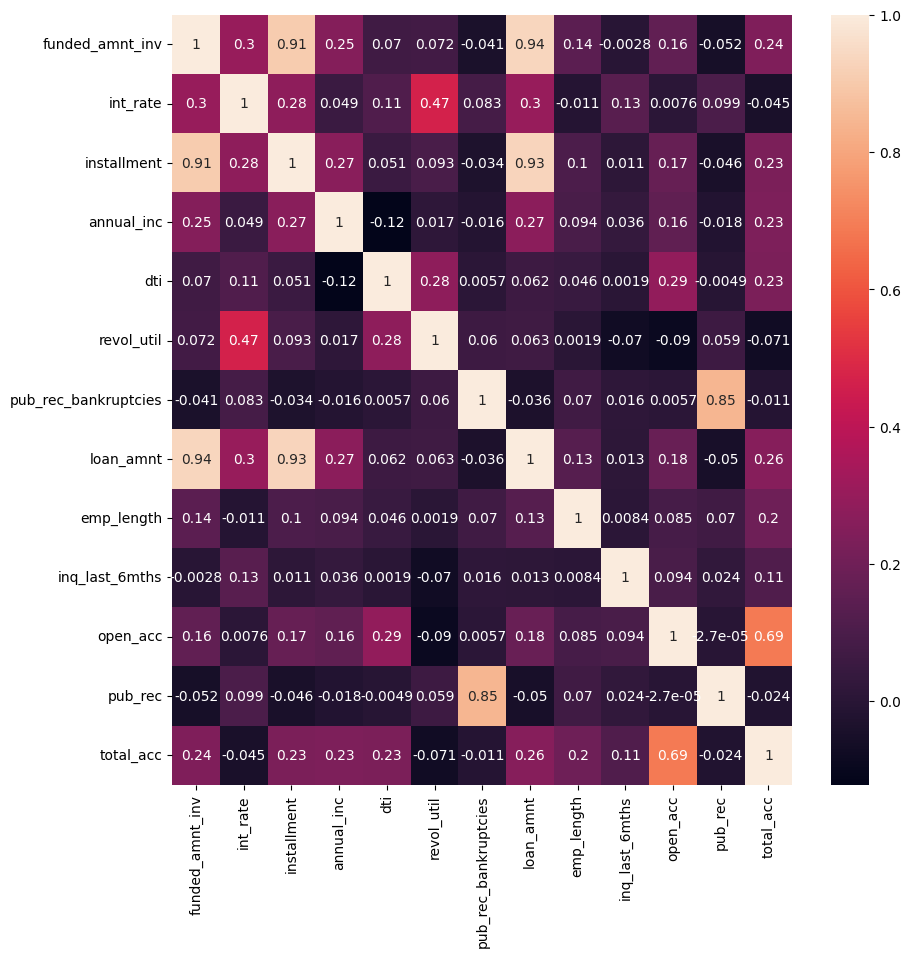

In [258]:
# Heatmap of correlation between variables
plt.figure(figsize=(10,10))
sns.heatmap(data[combined_index].corr(),annot=True)
plt.show()

# Conclusion Analysis

#### The study above relates to the loans that have been charged off. The likelihood of defaulting is higher when

- Highest amount of loan have small business
- 2011 Year was with highest loan amount and with projection seen it will keep increasing yearly
- Chared off and Fully paid loan are same for terms of loan period
- Highest amount of intrest rates is for loan amount to 30-35k
- Garde G has highest fully paid loan amount
- Rent has the lowest projection for the loan amount
- Loan amount on house has highest annual income
- Loan for 'home improvement' and have income of 60k -70k


In summary, the data analysis has unveiled a range of insights, with the presented conclusions representing only a fraction of the potential findings within the dataset. The richness of the data suggests a myriad of patterns, trends, and relationships yet to be explored. Further investigation and a comprehensive analysis may reveal additional nuances and offer a more comprehensive understanding of the underlying dynamics. The exploration of these untapped aspects could provide valuable perspectives and contribute to a more thorough interpretation of the dataset.

# Insights

#### Univariate Analysis

- Seven times fewer loans have fallen into default than have been fully paid for.
- As opposed to 60 months, the bulk of loans have a 36-month tenure.
- With a dip around 10, the interest rate is more densely packed between 5 and 10 and 10-15.
- Most loans are high grade loans, as seen by the significant percentage of loans with grades of "A" and "B" compared to the rest.
- The majority of borrowers have more than ten years of job experience.
- The majority of borrowers are renters or mortgage holders who do not own any property.
- Roughly half of the borrowers have their sources validated or are verified by the company.
- Given that yearly income has a left-skewed normal distribution, the bulk of burrowers have extremely low annual incomes in comparison to the rest.

#### Segmented Univariate Analysis

- Chared off and Fully paid loan are same for terms of loan period
- Highest amount of intrest rates is for loan amount to 30-35k

#### Bivariate Analysis

- Since the grade is a measure of risk, we can claim that interest rates rise as a result of risk.
- Since Grade A carries the lowest risk and the lowest DTI ratio, we can conclude that higher grades have lower default rates.
- Since most of the borrowers have no public record of bankruptcy,they are a secure option when it comes to loan issuance.

In [ ]:
https://raw.githubusercontent.com/AshishJangra27/Machine-Learning-with-Python-GFG/main/Linear%20Regression/data_for_lr.csv